In [3]:
import pandas as pd
import numpy as np
import scipy

prec = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/prec_1991_2015.xls')
temp = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/temp_1991_2015.xls')
occur = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/aegypti_albopictus.xlsx')

In [4]:
# Table of occurrences
occur_aux = occur.copy()
location = occur.copy()
occur.head()

,VECTOR,OCCURRENCE_ID,SOURCE_TYPE,LOCATION_TYPE,POLYGON_ADMIN,Y,X,YEAR,COUNTRY,COUNTRY_ID,GAUL_AD0,STATUS
0,Aedes aegypti,1,published,point,-999,-3.22,40.07,1958,Kenya,KEN,133,NaN
1,Aedes aegypti,2,published,point,-999,-4.27,15.30,1960,Congo,COG,59,NaN
2,Aedes aegypti,3,published,point,-999,-4.27,15.30,1960,Congo,COG,59,NaN
3,Aedes aegypti,4,published,point,-999,-3.22,40.07,1960,Kenya,KEN,133,NaN
4,Aedes aegypti,5,published,point,-999,-3.04,40.14,1960,Kenya,KEN,133,NaN


In [5]:
# Table of temperature
temp.head()

,tas,Year,Month,Country,ISO3,ISO2
0,25.3234,1991,1,MDG,NaN,NaN
1,24.8328,1991,2,MDG,NaN,NaN
2,24.6455,1991,3,MDG,NaN,NaN
3,23.4024,1991,4,MDG,NaN,NaN
4,21.7749,1991,5,MDG,NaN,NaN


In [6]:
# Table of precipitation
prec.head()

,pr,Year,Month,Country,ISO3,ISO2
0,127.9060,1991,1,LBN,NaN,NaN
1,67.7115,1991,2,LBN,NaN,NaN
2,140.4620,1991,3,LBN,NaN,NaN
3,47.5851,1991,4,LBN,NaN,NaN
4,15.3227,1991,5,LBN,NaN,NaN


In [7]:
# Rename the columns to match among themselves
temp.rename(columns={'\tYear':'Year', ' Month':'Month', ' Country':'Country'}, inplace=True)
prec.rename(columns={'\tYear':'Year', ' Month':'Month', ' Country':'Country'}, inplace=True)
occur.rename(columns={'YEAR':'Year', 'COUNTRY_ID':'Country'}, inplace=True)

In [8]:
# Add Taywan to dataset because the original source of temperatures and rainfall 
# doesn't contain this country. Taywan has several occurrences, so it was crutial
# to look for its data. 
taywan_temp = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/TWN_data.xlsx', sheet_name='Temp')
taywan_rain = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/TWN_data.xlsx', sheet_name='Rainfall')
taywan= pd.merge(taywan_temp, taywan_rain, how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
taywan.rename(columns={'temp':'tas'}, inplace=True)
taywan = taywan.loc[(taywan['Year']>=1991) & (taywan['Year']<=2015)].reset_index(drop=True)
taywan

,tas,Year,Country,pr
0,22.1,1991,TWN,2032.2
1,22.0,1992,TWN,2199.9
2,21.7,1993,TWN,1671.9
3,22.0,1994,TWN,2432.7
4,21.7,1995,TWN,1639.1
5,22.1,1996,TWN,2608.1
6,21.6,1997,TWN,2117.9
7,22.2,1998,TWN,2103.1
8,22.2,1999,TWN,2658.3
9,21.5,2000,TWN,2417.4


In [9]:
# Create a file with the merged data of Taywan
taywan.to_csv('taywan.csv')

In [10]:
# Read the Taywan table
taywan = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/taywan.csv')
taywan.drop(columns=['Unnamed: 0'],inplace=True)
taywan.shape

(25, 4)

## Preprocessing of Occurrences of mosquitoes Aedes

In [11]:
# Drop unnecessary columns for the analyzes
occur.drop(columns=['SOURCE_TYPE','LOCATION_TYPE','POLYGON_ADMIN','STATUS','GAUL_AD0','X','Y'],inplace=True)
occur.head()

,VECTOR,OCCURRENCE_ID,Year,COUNTRY,Country
0,Aedes aegypti,1,1958,Kenya,KEN
1,Aedes aegypti,2,1960,Congo,COG
2,Aedes aegypti,3,1960,Congo,COG
3,Aedes aegypti,4,1960,Kenya,KEN
4,Aedes aegypti,5,1960,Kenya,KEN


In [12]:
# Change the year type from string to int
occur['Year'] = pd.to_numeric(occur['Year'], downcast='integer',errors='coerce')
occur.describe()

,OCCURRENCE_ID,Year
count,42066.000000,40804.000000
mean,21033.500000,2006.723630
std,12143.552549,7.616601
min,1.000000,1958.000000
25%,10517.250000,2004.000000
50%,21033.500000,2008.000000
75%,31549.750000,2013.000000
max,42066.000000,2014.000000


In [13]:
# Select the timeframe of temperature and rainfall we colected 
occur = occur.loc[(occur['Year']>=1991) & (occur['Year']<=2015)]

# Set as NaN the countries we didn't find the temperature nor the rainfall
occur['Country'] = occur['Country'].replace('XXX', np.nan)
occur['Country'] = occur['Country'].replace('HKG', np.nan)

occur['Year'] = occur['Year'].astype(int)
occur.describe()

,OCCURRENCE_ID,Year
count,39172.000000,39172.000000
mean,21502.137113,2007.862734
std,11715.914535,4.979114
min,1069.000000,1991.000000
25%,11778.750000,2005.000000
50%,21571.500000,2008.000000
75%,31608.250000,2013.000000
max,42042.000000,2014.000000


In [237]:
# Aggregate the occurrences by country in an annual basis
annualOccur = pd.DataFrame(occur.groupby(['Year','Country'])['OCCURRENCE_ID'].count()).reset_index()
annualOccur.head()

,Year,Country,OCCURRENCE_ID
0,1991,AUS,31
1,1991,BRA,2
2,1991,COL,1
3,1991,FJI,4
4,1991,GUF,1


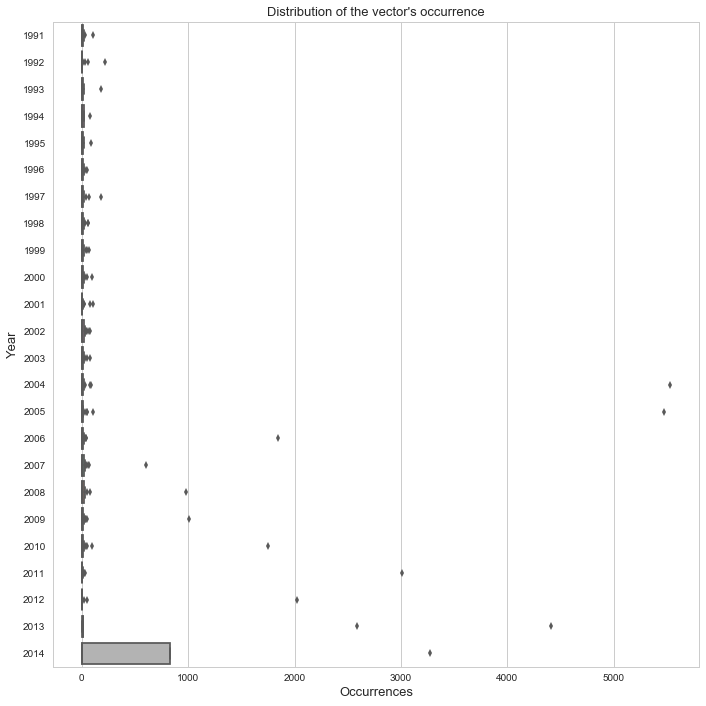

In [240]:
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})

f, (ax3) = plt.subplots(1, figsize=(10, 10), sharex=True)

ax = sns.boxplot(x='OCCURRENCE_ID', y='Year', data=annualOccur, orient="h", palette="Set2")
ax.set_ylabel('Year')
ax.set_xlabel('Occurrences')
ax.set_title("Distribution of the vector's occurrence", fontsize=13)
plt.tight_layout(h_pad=3)

In [226]:
annualOccurByCountry = pd.DataFrame(occur.groupby(['Year'])['OCCURRENCE_ID'].count()).reset_index()
annualOccurByCountry.head()

,Year,OCCURRENCE_ID
0,1991,191
1,1992,364
2,1993,252
3,1994,172
4,1995,211


In [227]:
annualOccurByCountry.describe()

,Year,OCCURRENCE_ID
count,24.000000,24.000000
mean,2002.500000,1632.166667
std,7.071068,2030.757316
min,1991.000000,172.000000
25%,1996.750000,268.500000
50%,2002.500000,406.500000
75%,2008.250000,2182.750000
max,2014.000000,7048.000000


In [228]:
annualOccurByCountry.columns


Index(['Year', 'OCCURRENCE_ID'], dtype='object')

In [232]:
bplot = annualOccurByCountry.copy()
bplot['OCCURRENCE_ID'] = bplot['OCCURRENCE_ID']/100
bplot.loc[bplot['OCCURRENCE_ID'].isin([np.nan, np.inf, -np.inf])]

,Year,OCCURRENCE_ID


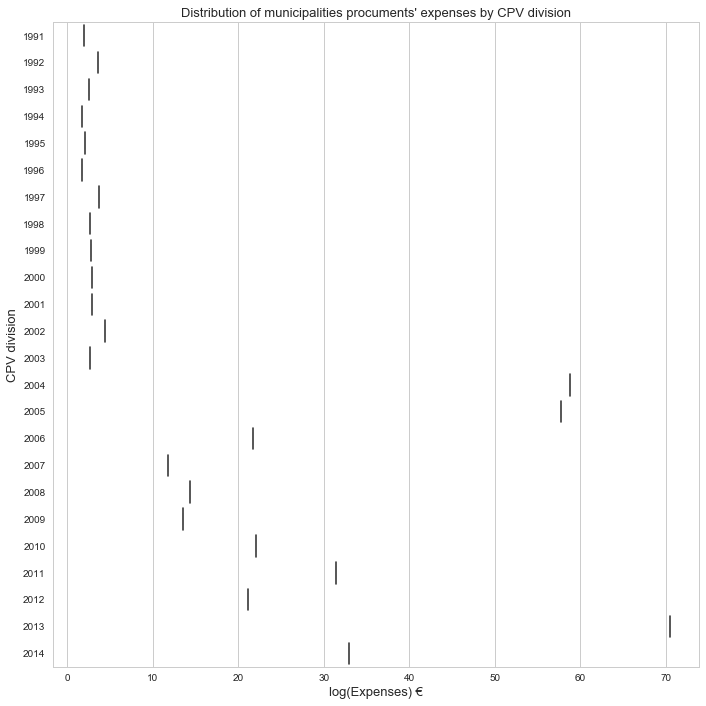

In [234]:
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})

f, (ax3) = plt.subplots(1, figsize=(10, 10), sharex=True)

ax = sns.boxplot(x='OCCURRENCE_ID', y='Year', data=bplot, orient="h", palette="Set2")
ax.set_ylabel('CPV division')
ax.set_xlabel('log(Expenses) €')
ax.set_title("Distribution of municipalities procuments' expenses by CPV division", fontsize=13)
plt.tight_layout(h_pad=3)

## Preprocessing of Temperature and Rainfall

In [15]:
# Aggregate the occurrences by country in an annual basis without Taywan
annualTemp = pd.DataFrame(temp.groupby(['Year','Country'])['tas'].sum()/12).reset_index()
annualPrec = pd.DataFrame(prec.groupby(['Year','Country'])['pr'].sum()/12).reset_index()
temp_rain=pd.merge(annualTemp,annualPrec,
                   how='inner',
                   left_on = ['Year','Country'],
                   right_on = ['Year','Country'])
temp_rain.describe()

,Year,tas,pr
count,3650.000000,3650.000000,3650.000000
mean,2003.000000,23.490532,137.480884
std,7.212091,14.660920,89.987102
min,1991.000000,-7.018926,4.440862
25%,1997.000000,19.656523,75.091654
50%,2003.000000,24.988167,124.989354
75%,2009.000000,26.483633,185.351331
max,2015.000000,187.946183,801.706467


## Merge of Temperature and Rainfall (Main Table)

In [16]:
# Add Taywan to the dataframe
temp_rain = pd.concat([temp_rain, taywan])

# Different abbreviation of the same country in different datasets
temp_rain['Country'] = temp_rain['Country'].replace('ROM', 'ROU')
temp_rain

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,Country,Year,pr,tas
0,ABW,1991,38.882968,28.078008
1,AFG,1991,36.931453,13.118033
2,AGO,1991,83.844948,21.652200
3,AIA,1991,113.631158,26.108292
4,ALB,1991,77.587033,11.038935
5,ARG,1991,52.792958,14.416431
6,ASM,1991,263.307917,26.879967
7,ATG,1991,183.339717,26.413642
8,AUS,1991,37.912953,22.172075
9,AUT,1991,94.343317,6.151395


## Merge Occurrences to the Main Table

In [17]:
temp_rain_occur=pd.merge(temp_rain,annualOccur,
                   how='left',
                   left_on = ['Year','Country'],
                   right_on = ['Year','Country'])
temp_rain_occur.rename(columns={'OCCURRENCE_ID':'Occurrences', 'tas':'Temperature', 'pr':'Precipitation'}, inplace=True)
temp_rain_occur.shape

(3675, 5)

In [18]:
temp_rain_occur.describe()

,Year,Precipitation,Temperature,Occurrences
count,3675.000000,3675.000000,3675.000000,632.000000
mean,2003.000000,150.946483,23.479929,61.971519
std,7.212084,187.992485,14.611533,430.992062
min,1991.000000,4.440862,-7.018926,1.000000
25%,1997.000000,75.340175,19.721479,1.000000
50%,2003.000000,125.000000,24.962717,4.000000
75%,2009.000000,186.939941,26.450129,12.000000
max,2015.000000,2744.000000,187.946183,5527.000000


In [19]:
# Fill the the year in which no occurrences happened in the countries
temp_rain_occur.fillna(0,inplace=True)
temp_rain_occur.head()

,Country,Year,Precipitation,Temperature,Occurrences
0,ABW,1991,38.882968,28.078008,0.0
1,AFG,1991,36.931453,13.118033,0.0
2,AGO,1991,83.844948,21.652200,0.0
3,AIA,1991,113.631158,26.108292,0.0
4,ALB,1991,77.587033,11.038935,0.0


In [20]:
# File containing temperature, rainfall and occurrences
temp_rain_occur.to_csv('occurrences.csv', encoding='utf-8', index=False)

## Preprocessing of Urbanization

In [21]:
# Dataset about urban and rural population percentage
urb = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/urban.csv')
urb.rename(columns={'Code':'Country'}, inplace=True)
urb.describe()

,Year,Urban (%),Rural (%)
count,27977.000000,27977.000000,27977.000000
mean,1996.039139,53.575697,46.424303
std,46.798435,26.745724,26.745724
min,1500.000000,0.000000,0.000000
25%,1974.000000,31.712000,24.386000
50%,1999.000000,53.767149,46.232853
75%,2025.000000,75.614000,68.288002
max,2050.000000,100.000000,100.000000


In [22]:
# Check for countries of the main Dataframe that aren't in the urbanization dataset
countryList = urb['Country'].unique()
temp_rain_occur[~temp_rain_occur['Country'].isin(countryList)]

,Country,Year,Precipitation,Temperature,Occurrences
144,ZAR,1991,122.501517,24.110358,0.0
290,ZAR,1992,117.536158,24.069758,0.0
436,ZAR,1993,117.356483,23.846467,0.0
582,ZAR,1994,113.701350,24.098975,0.0
728,ZAR,1995,119.591717,24.466525,0.0
874,ZAR,1996,109.121400,24.239275,0.0
1020,ZAR,1997,127.673542,24.643383,0.0
1166,ZAR,1998,117.678642,24.657525,0.0
1312,ZAR,1999,125.678100,24.023367,0.0
1458,ZAR,2000,121.259100,24.291200,0.0


In [23]:
# Fix the difference of abbreviations for Rep. Dem. Congo
temp_rain_occur['Country']  = temp_rain_occur['Country'].replace('ZAR', 'COD')
temp_rain_occur[~temp_rain_occur['Country'].isin(countryList)]

,Country,Year,Precipitation,Temperature,Occurrences


## Merge urbanization to the Main Table

In [24]:
urban= pd.merge(temp_rain_occur, urb,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
urban.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%)
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000


## Normalization of the Country Code list

In [25]:
# Dataset of country names with country codes
countryCodes = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/CountryCodes.xlsx')
countryCodes = countryCodes.rename(columns={'Country ':'Country'})
countryCodes

,Country,Code
0,AFRICA,
1,Eastern Africa,
2,Burundi,BDI
3,Comoros,COM
4,Djibouti,DJI
5,Eritrea,ERI
6,Ethiopia,ETH
7,Kenya,KEN
8,Madagascar,MDG
9,Malawi,MWI


In [26]:
# Some country names diverge in different DataFrame and, therefore, the code of the country wasn't added.
# In order to fix it, the codes were manually concatened to the former list codes
d = {'Country': ['United States',
                 "CÙte d'Ivoire",
                 "Congo (Democratic Republic of the)",
                 "Korea (Republic of)",
                 "Tanzania (United Republic of)"],
     'Code': ['USA', 'CIV', 'COD', 'KOR', 'TZA']}
wrongCode = pd.DataFrame(data=d)

aux = [countryCodes, wrongCode]

countryCodes = pd.concat(aux)
countryCodes

,Country,Code
0,AFRICA,
1,Eastern Africa,
2,Burundi,BDI
3,Comoros,COM
4,Djibouti,DJI
5,Eritrea,ERI
6,Ethiopia,ETH
7,Kenya,KEN
8,Madagascar,MDG
9,Malawi,MWI


## Preprocessing of the HDI

In [27]:
# Dataset of the HDI
hdi = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/HDI.xlsx')
hdi['Country'] = hdi['Country'].str.strip()

In [28]:
hdi=pd.merge(hdi,countryCodes,
                   how='left',
                   left_on = ['Country'],
                   right_on = ['Country'])

# Even though some country names diverge and, moreover, the code of the country wasn't added,
# these contries don't belong to main DataFrame. Therefore, they're not relevant
hdi.loc[hdi['Code'].isnull()]

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Code
56,144,Eswatini (Kingdom of),0.536,0.537,0.536,0.531,0.524,0.520,0.513,0.504,...,0.527,0.538,0.550,0.561,0.572,0.580,0.584,0.586,0.588,NaN
74,7,"Hong Kong, China (SAR)",0.781,0.786,0.791,0.799,0.804,0.808,0.811,0.816,...,0.898,0.901,0.904,0.911,0.915,0.923,0.927,0.930,0.933,NaN
112,131,Micronesia (Federated States of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.603,0.608,0.613,0.616,0.619,0.618,0.627,0.627,0.627,NaN
113,112,Moldova (Republic of),0.651,0.640,0.620,0.618,0.595,0.594,0.591,0.593,...,0.662,0.670,0.677,0.684,0.693,0.696,0.693,0.697,0.700,NaN
130,119,"Palestine, State of",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.670,0.672,0.677,0.687,0.679,0.679,0.687,0.689,0.686,NaN
168,80,The former Yugoslav Republic of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.731,0.735,0.738,0.740,0.743,0.747,0.754,0.756,0.757,NaN


In [29]:
# Drop useless columns
hdi.drop(columns=['HDI Rank (2017)','Country'],inplace=True)
hdi.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Code
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498,AFG
1,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,0.652,0.662,...,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785,ALB
2,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,0.627,0.636,...,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754,DZA
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858,AND
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.374,...,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581,AGO


In [30]:
hdi.columns

Index([  1990,   1991,   1992,   1993,   1994,   1995,   1996,   1997,   1998,
         1999,   2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,
         2008,   2009,   2010,   2011,   2012,   2013,   2014,   2015,   2016,
         2017, 'Code'],
      dtype='object')

In [31]:
hdi.columns = hdi.columns.astype(str)
hdi.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', 'Code'],
      dtype='object')

In [32]:
# Adjust HDI to the format the main table it is set
values = hdi.loc[:, '1990':'2017']
hdiAdj = pd.melt(hdi, id_vars=['Code'], value_vars=values)
hdiAdj.head()

,Code,variable,value
0,AFG,1990,NaN
1,ALB,1990,0.645
2,DZA,1990,0.577
3,AND,1990,NaN
4,AGO,1990,NaN


In [33]:
hdiAdj.describe()

,value
count,4757.000000
mean,0.655067
std,0.165734
min,0.199000
25%,0.529000
50%,0.680000
75%,0.783000
max,0.953000


In [34]:
hdiAdj.dtypes

Code         object
variable     object
value       float64
dtype: object

In [35]:
# Rename to the format of the other tables
hdiAdj.rename(columns={'Code':'Country', 'variable':'Year', 'value':'HDI'}, inplace=True)
hdiAdj['Year'] = hdiAdj['Year'].astype(float)

In [36]:
# Add Taywan HDI, which was found in a different source
hdiTay = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/HDI_TWN.xlsx')
hdiTay.head()

,Year,Unnamed: 1,HDI
0,1991,NaN,0.837
1,1992,NaN,0.837
2,1993,NaN,0.843
3,1994,NaN,0.849
4,1995,NaN,0.854


In [37]:
hdiTay.rename(columns={'Unnamed: 1':'Country'}, inplace=True)
hdiTay['Country'].replace(np.nan,'TWN', inplace=True)
hdiTay.head()

,Year,Country,HDI
0,1991,TWN,0.837
1,1992,TWN,0.837
2,1993,TWN,0.843
3,1994,TWN,0.849
4,1995,TWN,0.854


In [38]:
hdiAdj = pd.concat([hdiAdj, hdiTay])
hdiAdj.reset_index(drop=True)

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,Country,HDI,Year
0,AFG,NaN,1990.0
1,ALB,0.645,1990.0
2,DZA,0.577,1990.0
3,AND,NaN,1990.0
4,AGO,NaN,1990.0
5,ATG,NaN,1990.0
6,ARG,0.704,1990.0
7,ARM,0.631,1990.0
8,AUS,0.866,1990.0
9,AUT,0.795,1990.0


In [39]:
# Select the timeframe of the main table
hdiAdj = hdiAdj.loc[(hdiAdj['Year']>=1991) & (hdiAdj['Year']<=2015)]
hdiAdj['Country'].isnull().sum()

150

## Merge HDI to the Main Table

In [40]:
# Check for countries of the main Dataframe that aren't in the HDI dataset
countryList = hdiAdj['Country'].unique()
urban['Country'].loc[~urban['Country'].isin(countryList)].unique()

array(['ABW', 'AIA', 'ASM', 'BMU', 'COK', 'CYM', 'GLP', 'GUF', 'GUM',
       'MAC', 'MNP', 'MSR', 'MTQ', 'MYT', 'NCL', 'NIU', 'NRU', 'PRI',
       'PYF', 'REU', 'SOM', 'TKL', 'TUV', 'VGB', 'WLF'], dtype=object)

In [41]:
data= pd.merge(urban, hdiAdj,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
data['HDI'] = data['HDI'].astype('float')
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000


## Preprocessing of the Population

In [42]:
pop = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/Population.csv')
#hdi['Country'] = hdi['Country'].str.strip()

In [43]:
pop.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.118
1,4,Afghanistan,2,Medium,1951,1951.5,4134.477,3705.031,7839.510
2,4,Afghanistan,2,Medium,1952,1952.5,4173.993,3760.979,7934.980
3,4,Afghanistan,2,Medium,1953,1953.5,4217.860,3820.747,8038.596
4,4,Afghanistan,2,Medium,1954,1954.5,4266.104,3884.348,8150.447


In [44]:
# Drop unnecessary columns and rename for the analyzes
pop.drop(columns=['VarID','LocID','Variant','MidPeriod','PopMale','PopFemale'],inplace=True)
pop.rename(columns={'Time':'Year', 'Location':'Country'}, inplace=True)
pop.head()

,Country,Year,PopTotal
0,Afghanistan,1950,7752.118
1,Afghanistan,1951,7839.510
2,Afghanistan,1952,7934.980
3,Afghanistan,1953,8038.596
4,Afghanistan,1954,8150.447


In [45]:
pop=pd.merge(pop,countryCodes,
                   how='left',
                   left_on = ['Country'],
                   right_on = ['Country'])

# Even though some country names diverge and, moreover, the code of the country wasn't added,
# these contries don't belong to main DataFrame. Therefore, they're not relevant
pop['Country'].loc[pop['Code'].isnull()].unique()

array(['Africa', 'Asia', 'Europe', 'High-income countries',
       'Latin America and the Caribbean', 'Least developed countries',
       'Less developed regions',
       'Less developed regions, excluding China',
       'Less developed regions, excluding least developed countries',
       'Low-income countries', 'Lower-middle-income countries',
       'Middle-income countries', 'More developed regions',
       'Northern America', 'Oceania', 'Sub-Saharan Africa',
       'Upper-middle-income countries', 'World'], dtype=object)

In [46]:
pop.head()

,Country,Year,PopTotal,Code
0,Afghanistan,1950,7752.118,AFG
1,Afghanistan,1951,7839.510,AFG
2,Afghanistan,1952,7934.980,AFG
3,Afghanistan,1953,8038.596,AFG
4,Afghanistan,1954,8150.447,AFG


In [47]:
# Rename to the format of the other tables
pop.drop(columns=['Country'],inplace=True)
pop.rename(columns={'Code':'Country'}, inplace=True)

In [48]:
# Select the timeframe of the main table
pop = pop.loc[(pop['Year']>=1991) & (pop['Year']<=2015)]
pop.head()

,Year,PopTotal,Country
41,1991,12993.657,AFG
42,1992,13981.231,AFG
43,1993,15095.099,AFG
44,1994,16172.719,AFG
45,1995,17099.541,AFG


In [49]:
pop.describe()

,Year,PopTotal
count,61425.000000,6.142500e+04
mean,2003.000000,1.985224e+05
std,7.211161,7.663329e+05
min,1991.000000,7.740000e-01
25%,1997.000000,5.288480e+02
50%,2003.000000,6.468827e+03
75%,2009.000000,3.468743e+04
max,2015.000000,7.383009e+06


In [50]:
# Drop duplicated lines
pop=pop.drop_duplicates()
pop.describe()

,Year,PopTotal
count,6825.000000,6.825000e+03
mean,2003.000000,1.985224e+05
std,7.211631,7.663828e+05
min,1991.000000,7.740000e-01
25%,1997.000000,5.288480e+02
50%,2003.000000,6.468827e+03
75%,2009.000000,3.468743e+04
max,2015.000000,7.383009e+06


## Merge Population to the Main Table

In [51]:
data= pd.merge(data, pop,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI,PopTotal
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000,3.675000e+03
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353,3.813460e+04
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723,1.445042e+05
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000,1.126000e+00
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500,3.869210e+02
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000,5.417070e+03
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000,2.273127e+04
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000,1.397029e+06


## Preprocessing of the Education

In [52]:
# Dataset of the Education
education = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/education.xlsx')
education['Country'] = education['Country'].str.strip()
education

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,0.122,0.133,0.145,0.156,0.168,0.179,0.190,0.202,...,0.347,0.359,0.371,0.382,0.390,0.398,0.406,0.410,0.410,0.415
1,68,Albania,0.584,0.589,0.558,0.543,0.542,0.551,0.558,0.571,...,0.646,0.652,0.673,0.693,0.730,0.732,0.733,0.733,0.742,0.745
2,85,Algeria,0.385,0.395,0.405,0.414,0.424,0.431,0.443,0.458,...,0.588,0.608,0.626,0.644,0.652,0.660,0.661,0.662,0.663,0.664
3,35,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.661,0.661,0.662,0.663,0.715,0.715,0.716,0.715,0.714,0.714
4,147,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.390,0.404,0.398,0.423,0.435,0.447,0.460,0.472,0.487,0.498
5,70,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.674,0.672,0.667,0.659,0.663,0.669,0.669,0.676,0.676,0.676
6,47,Argentina,0.628,0.632,0.634,0.636,0.639,0.648,0.659,0.670,...,0.753,0.775,0.802,0.807,0.805,0.804,0.808,0.812,0.814,0.816
7,83,Armenia,0.634,0.637,0.636,0.642,0.636,0.632,0.628,0.641,...,0.712,0.729,0.731,0.732,0.735,0.739,0.742,0.746,0.749,0.749
8,3,Australia,0.873,0.874,0.874,0.875,0.875,0.894,0.895,0.895,...,0.911,0.909,0.913,0.916,0.919,0.921,0.924,0.926,0.929,0.929
9,20,Austria,0.676,0.683,0.692,0.694,0.705,0.709,0.712,0.715,...,0.809,0.819,0.837,0.838,0.841,0.833,0.844,0.847,0.852,0.852


In [53]:
education=pd.merge(education,countryCodes,
                   how='left',
                   left_on = ['Country'],
                   right_on = ['Country'])

# Even though some country names diverge and, moreover, the code of the country wasn't added,
# these contries don't belong to main DataFrame. Therefore, they're not relevant
education.loc[education['Code'].isnull()]

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Code
56,144,Eswatini (Kingdom of),0.407,0.412,0.413,0.412,0.410,0.408,0.404,0.401,...,0.491,0.501,0.508,0.515,0.522,0.528,0.528,0.528,0.528,NaN
74,7,"Hong Kong, China (SAR)",0.640,0.645,0.650,0.655,0.660,0.665,0.669,0.673,...,0.807,0.808,0.807,0.824,0.830,0.846,0.852,0.855,0.855,NaN
112,131,Micronesia (Federated States of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.552,0.564,0.573,0.581,0.590,0.590,0.590,0.592,0.590,NaN
113,112,Moldova (Republic of),0.598,0.597,0.596,0.595,0.594,0.593,0.586,0.590,...,0.697,0.696,0.699,0.709,0.716,0.714,0.709,0.710,0.710,NaN
130,119,"Palestine, State of",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.651,0.655,0.660,0.667,0.654,0.655,0.657,0.660,0.660,NaN
168,80,The former Yugoslav Republic of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.657,0.662,0.667,0.670,0.673,0.676,0.689,0.691,0.691,NaN


In [54]:
# Drop useless columns
education.drop(columns=['HDI Rank (2017)','Country'],inplace=True)
education.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Code
0,0.122,0.133,0.145,0.156,0.168,0.179,0.190,0.202,0.213,0.224,...,0.359,0.371,0.382,0.390,0.398,0.406,0.410,0.410,0.415,AFG
1,0.584,0.589,0.558,0.543,0.542,0.551,0.558,0.571,0.580,0.586,...,0.652,0.673,0.693,0.730,0.732,0.733,0.733,0.742,0.745,ALB
2,0.385,0.395,0.405,0.414,0.424,0.431,0.443,0.458,0.473,0.487,...,0.608,0.626,0.644,0.652,0.660,0.661,0.662,0.663,0.664,DZA
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.661,0.662,0.663,0.715,0.715,0.716,0.715,0.714,0.714,AND
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276,...,0.404,0.398,0.423,0.435,0.447,0.460,0.472,0.487,0.498,AGO


In [55]:
education.columns

Index([  1990,   1991,   1992,   1993,   1994,   1995,   1996,   1997,   1998,
         1999,   2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,
         2008,   2009,   2010,   2011,   2012,   2013,   2014,   2015,   2016,
         2017, 'Code'],
      dtype='object')

In [56]:
education.columns = education.columns.astype(str)
education.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', 'Code'],
      dtype='object')

In [57]:
# Adjust education to the format the main table it is set
values = education.loc[:, '1990':'2017']
educationAdj = pd.melt(education, id_vars=['Code'], value_vars=values)
educationAdj.head()

,Code,variable,value
0,AFG,1990,0.122
1,ALB,1990,0.584
2,DZA,1990,0.385
3,AND,1990,NaN
4,AGO,1990,NaN


In [58]:
educationAdj.describe()

,value
count,4773.000000
mean,0.577983
std,0.187790
min,0.081000
25%,0.436000
50%,0.609000
75%,0.714000
max,0.941000


In [59]:
educationAdj.dtypes

Code         object
variable     object
value       float64
dtype: object

In [60]:
# Rename to the format of the other tables
educationAdj.rename(columns={'Code':'Country', 'variable':'Year', 'value':'Education'}, inplace=True)
educationAdj['Year'] = educationAdj['Year'].astype(float)

In [61]:
# Select the timeframe of the main table
educationAdj = educationAdj.loc[(educationAdj['Year']>=1991) & (educationAdj['Year']<=2015)]
educationAdj['Country'].isnull().sum()
# The same amount as in HDI

150

## Merge education to the main table

In [62]:
# Check for countries of the main Dataframe that aren't in the HDI dataset
countryList = educationAdj['Country'].unique()
urban['Country'].loc[~urban['Country'].isin(countryList)].unique()

array(['ABW', 'AIA', 'ASM', 'BMU', 'COK', 'CYM', 'GLP', 'GUF', 'GUM',
       'MAC', 'MNP', 'MSR', 'MTQ', 'MYT', 'NCL', 'NIU', 'NRU', 'PRI',
       'PYF', 'REU', 'SOM', 'TKL', 'TUV', 'VGB', 'WLF', 'TWN'],
      dtype=object)

In [63]:
data= pd.merge(data, educationAdj,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI,PopTotal,Education
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000,3.675000e+03,2738.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353,3.813460e+04,0.563970
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723,1.445042e+05,0.185258
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000,1.126000e+00,0.125000
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500,3.869210e+02,0.416000
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000,5.417070e+03,0.589000
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000,2.273127e+04,0.702000
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000,1.397029e+06,0.940000


## Preprocessing Dengue fever occurrences

In [64]:
dengue = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/Dengue.xlsx')
dengue

,LOCATION_TYPE,ADMIN_LEVEL,GAUL_AD0,GAUL_AD1,GAUL_AD2,POINT_ID,UNIQUE_LOCATION,X,Y,YEAR,COUNTRY,REGION
0,polygon,2,240,1761,26423,-999,104144,100.504418,13.748735,1960,Thailand,Asia
1,polygon,2,240,1761,26404,-999,104125,100.481002,13.730408,1960,Thailand,Asia
2,polygon,0,222,-999,-999,-999,3346,103.807965,1.349812,1960,Singapore,Asia
3,point,-999,1011447,1012403,1002835,1219,1219,105.945053,10.371660,1960,Viet Nam,Asia
4,polygon,2,240,1761,26423,-999,104144,100.504418,13.748735,1961,Thailand,Asia
5,polygon,2,240,1761,26404,-999,104125,100.481002,13.730408,1961,Thailand,Asia
6,polygon,2,115,1542,70254,-999,147975,78.998148,12.800638,1962,India,Asia
7,polygon,2,240,1761,26423,-999,104144,100.504418,13.748735,1962,Thailand,Asia
8,polygon,2,240,1761,26404,-999,104125,100.481002,13.730408,1962,Thailand,Asia
9,polygon,2,1011447,1719,1003287,-999,1003287,105.827366,21.036487,1963,Viet Nam,Asia


In [65]:
# Drop unnecessary columns for the analyzes
dengue.drop(columns=['ADMIN_LEVEL','LOCATION_TYPE','GAUL_AD0','GAUL_AD1','GAUL_AD2','POINT_ID',
                     'UNIQUE_LOCATION', 'X', 'Y'],inplace=True)
dengue['COUNTRY'] = dengue['COUNTRY'].str.strip()
dengue.head()

,YEAR,COUNTRY,REGION
0,1960,Thailand,Asia
1,1960,Thailand,Asia
2,1960,Singapore,Asia
3,1960,Viet Nam,Asia
4,1961,Thailand,Asia


In [66]:
dengue.describe()

,YEAR
count,8309.000000
mean,2000.734986
std,9.690631
min,1960.000000
25%,1997.000000
50%,2003.000000
75%,2008.000000
max,2012.000000


In [67]:
# Select the timeframe necessary
dengue = dengue.loc[(dengue['YEAR']>=1991) & (dengue['YEAR']<=2015)]
dengue.describe()

,YEAR
count,7189.000000
mean,2003.839894
std,5.313603
min,1991.000000
25%,2000.000000
50%,2005.000000
75%,2008.000000
max,2012.000000


In [68]:
# Aggregate the occurrences by country in an annual basis
annualDengue = pd.DataFrame(dengue.groupby(['YEAR','COUNTRY']).count()).reset_index()

# Fix the divergency of names between tables
annualDengue['COUNTRY'] = annualDengue['COUNTRY'].replace('Reunion', 'R?union')
annualDengue['COUNTRY'] = annualDengue['COUNTRY'].replace("Cote d'Ivoire", "C?te d'Ivoire")
annualDengue.head()

,YEAR,COUNTRY,REGION
0,1991,Australia,1
1,1991,Brazil,46
2,1991,China,3
3,1991,Djibouti,1
4,1991,French Guiana,3


In [69]:
annualDengue.describe()

,YEAR,REGION
count,885.000000,885.000000
mean,2002.866667,8.115254
std,5.791071,18.262114
min,1991.000000,1.000000
25%,1998.000000,1.000000
50%,2004.000000,3.000000
75%,2008.000000,8.000000
max,2012.000000,313.000000


In [70]:
# Find the country codes for the dengue table
occur_aux = occur_aux[['COUNTRY', 'COUNTRY_ID']].drop_duplicates()
annualDengue=pd.merge(annualDengue,occur_aux,
                   how='left',
                   left_on = ['COUNTRY'],
                   right_on = ['COUNTRY'])
annualDengue.isnull().sum()

YEAR           0
COUNTRY        0
REGION         0
COUNTRY_ID    59
dtype: int64

In [71]:
# Find the divergence of country names, so the ones that are in the main table are fixed
wrongCodes = annualDengue.loc[annualDengue['COUNTRY_ID'].isnull()]
wrongCodes = pd.DataFrame(wrongCodes.groupby(['COUNTRY']).count()).reset_index()
wrongCodes
# These ones found below don't matter for the analyzis 

,COUNTRY,YEAR,REGION,COUNTRY_ID
0,Cape Verde,1,1,0
1,Chad,14,14,0
2,Chile,4,4,0
3,Ecuador,14,14,0
4,Ethiopia,1,1,0
5,Guinea-Bissau,1,1,0
6,Jammu Kashmir,1,1,0
7,Mali,3,3,0
8,Micronesia (Federated States of),6,6,0
9,Netherlands Antilles,3,3,0


In [72]:
annualDengue = annualDengue.loc[~annualDengue['COUNTRY_ID'].isnull()]
annualDengue.drop(columns=['COUNTRY'],inplace=True)
annualDengue.rename(columns={'YEAR':'Year', 'COUNTRY_ID':'Country', 'REGION':'Dengue'}, inplace=True)
annualDengue.head()

,Year,Dengue,Country
0,1991,1,AUS
1,1991,46,BRA
2,1991,3,CHN
3,1991,1,DJI
4,1991,3,GUF


In [73]:
annualDengue.describe()

,Year,Dengue
count,826.000000,826.000000
mean,2002.759080,8.506053
std,5.809611,18.833319
min,1991.000000,1.000000
25%,1998.000000,1.000000
50%,2003.000000,3.000000
75%,2008.000000,8.000000
max,2012.000000,313.000000


In [74]:
# Add Taywan cases, which has a different source
dengueTay = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/dengue_TWN.xlsx')
dengueTay.head()

,Year,Dengue
0,1998,344
1,1999,68
2,2000,139
3,2001,281
4,2002,5388


In [75]:
dengueTay['Country'] = 'TWN'
dengueTay

,Year,Dengue,Country
0,1998,344,TWN
1,1999,68,TWN
2,2000,139,TWN
3,2001,281,TWN
4,2002,5388,TWN
5,2003,145,TWN
6,2004,427,TWN
7,2005,306,TWN
8,2006,1074,TWN
9,2007,2179,TWN


In [76]:
annualDengue = pd.concat([dengueTay, annualDengue])
annualDengue.head()

,Year,Dengue,Country
0,1998,344,TWN
1,1999,68,TWN
2,2000,139,TWN
3,2001,281,TWN
4,2002,5388,TWN


In [77]:
annualDengue.isnull().sum()

Year       0
Dengue     0
Country    0
dtype: int64

In [78]:
annualDengue.describe()

,Year,Dengue
count,844.000000,844.000000
mean,2002.838863,100.231043
std,5.822206,1616.525835
min,1991.000000,1.000000
25%,1998.000000,1.000000
50%,2003.000000,3.000000
75%,2008.000000,9.000000
max,2015.000000,43784.000000


## Merge the dengue to the main table

In [79]:
countryList = urban['Country'].unique()
annualDengue['Country'].loc[~annualDengue['Country'].isin(countryList)].unique()

array(['HKG'], dtype=object)

In [80]:
data= pd.merge(data, annualDengue,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
data['Dengue'].fillna(0,inplace=True)
data.head()

,Country,Year,Precipitation,Temperature,Occurrences,Entity,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999,NaN,64.622,NaN,0.0
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001,NaN,12993.657,0.133,0.0
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998,NaN,12553.446,NaN,0.0
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000,NaN,8.666,NaN,0.0
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999,0.626,3275.431,0.589,0.0


## Preprocessing of population density

In [81]:
pop_dens = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/pop_dens.xlsx')
pop_dens['Country'] = pop_dens['Country'].str.strip()
pop_dens.head()

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Sub-Saharan Africa,23.174668,23.813921,24.466434,25.133139,25.814962,26.512715,27.227161,27.959252,28.710008,...,34.609050,35.567807,36.557755,37.577989,38.627657,39.706854,40.815382,41.951659,43.113628,44.299665
1,AFRICA,21.983018,22.571859,23.168703,23.772577,24.383103,25.000286,25.625353,26.260780,26.909845,...,31.979924,32.793112,33.632235,34.499530,35.396294,36.323406,37.279659,38.261596,39.264399,40.284354
2,Eastern Africa,30.594786,31.382018,32.176390,33.008152,33.898955,34.857698,35.877913,36.947321,38.046614,...,46.391211,47.743440,49.138567,50.572391,52.041677,53.545701,55.085050,56.659297,58.268189,59.911282
3,Burundi,215.811838,220.449338,224.742913,228.645132,232.167368,235.245794,238.010008,240.901558,244.507009,...,298.883879,309.173403,319.792212,330.569743,341.391355,352.161526,362.917056,373.839019,385.194315,397.167835
4,Comoros,227.765717,234.523375,241.415368,248.402472,255.450833,262.561526,269.722192,276.939817,284.174100,...,336.606663,344.771628,353.159054,361.768941,370.602902,379.671682,388.967222,398.441698,408.052123,417.745298


In [82]:
pop_dens=pd.merge(pop_dens,countryCodes,
                   how='left',
                   left_on = ['Country'],
                   right_on = ['Country'])

# Even though some country names diverge and, moreover, the code of the country wasn't added,
# these contries don't belong to main DataFrame. Therefore, they're not relevant
pop_dens.loc[pop_dens['Code'].isnull()]

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Code
0,Sub-Saharan Africa,23.174668,23.813921,24.466434,25.133139,25.814962,26.512715,27.227161,27.959252,28.710008,...,35.567807,36.557755,37.577989,38.627657,39.706854,40.815382,41.951659,43.113628,44.299665,NaN


In [83]:
# Drop useless columns
pop_dens.drop(columns=['Country'],inplace=True)
pop_dens.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Code
0,23.174668,23.813921,24.466434,25.133139,25.814962,26.512715,27.227161,27.959252,28.710008,29.480592,...,35.567807,36.557755,37.577989,38.627657,39.706854,40.815382,41.951659,43.113628,44.299665,NaN
1,21.983018,22.571859,23.168703,23.772577,24.383103,25.000286,25.625353,26.260780,26.909845,27.575308,...,32.793112,33.632235,34.499530,35.396294,36.323406,37.279659,38.261596,39.264399,40.284354,
2,30.594786,31.382018,32.176390,33.008152,33.898955,34.857698,35.877913,36.947321,38.046614,39.162232,...,47.743440,49.138567,50.572391,52.041677,53.545701,55.085050,56.659297,58.268189,59.911282,
3,215.811838,220.449338,224.742913,228.645132,232.167368,235.245794,238.010008,240.901558,244.507009,249.248676,...,309.173403,319.792212,330.569743,341.391355,352.161526,362.917056,373.839019,385.194315,397.167835,BDI
4,227.765717,234.523375,241.415368,248.402472,255.450833,262.561526,269.722192,276.939817,284.174100,291.433100,...,344.771628,353.159054,361.768941,370.602902,379.671682,388.967222,398.441698,408.052123,417.745298,COM


In [84]:
pop_dens.columns

Index([  1991,   1992,   1993,   1994,   1995,   1996,   1997,   1998,   1999,
         2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,   2008,
         2009,   2010,   2011,   2012,   2013,   2014,   2015, 'Code'],
      dtype='object')

In [85]:
pop_dens.columns = pop_dens.columns.astype(str)
pop_dens.columns

Index(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Code'],
      dtype='object')

In [86]:
values = pop_dens.loc[:, '1990':'2017']
pop_densAdj = pd.melt(pop_dens, id_vars=['Code'], value_vars=values)
pop_densAdj.head()

,Code,variable,value
0,NaN,1991,23.174668
1,,1991,21.983018
2,,1991,30.594786
3,BDI,1991,215.811838
4,COM,1991,227.765717


In [87]:
pop_densAdj.describe()

,value
count,6550.000000
mean,349.390709
std,1791.296501
min,0.135922
25%,26.193940
50%,73.861908
75%,174.206696
max,25709.395973


In [88]:
pop_densAdj.dtypes

Code         object
variable     object
value       float64
dtype: object

In [89]:
# Rename to the format of the other tables
pop_densAdj.rename(columns={'Code':'Country', 'variable':'Year', 'value':'PopDens'}, inplace=True)
pop_densAdj['Year'] = pop_densAdj['Year'].astype(float)

In [90]:
# Select the timeframe of the main table
pop_densAdj = pop_densAdj.loc[(pop_densAdj['Year']>=1991) & (pop_densAdj['Year']<=2015)]
pop_densAdj['Country'].isnull().sum()
# The same amount as in HDI

25

## Merge population density to the main table

In [91]:
# Check for countries of the main Dataframe that aren't in the HDI dataset
countryList = pop_densAdj['Country'].unique()
urban['Country'].loc[~urban['Country'].isin(countryList)].unique()

array([], dtype=object)

In [92]:
data.head()

,Country,Year,Precipitation,Temperature,Occurrences,Entity,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999,NaN,64.622,NaN,0.0
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001,NaN,12993.657,0.133,0.0
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998,NaN,12553.446,NaN,0.0
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000,NaN,8.666,NaN,0.0
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999,0.626,3275.431,0.589,0.0


In [93]:
data= pd.merge(data, pop_densAdj,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue,PopDens
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000,3.675000e+03,2738.000000,3675.000000,3675.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353,3.813460e+04,0.563970,23.016599,310.812377
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723,1.445042e+05,0.185258,775.478581,1392.446109
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000,1.126000e+00,0.125000,0.000000,1.468139
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500,3.869210e+02,0.416000,0.000000,32.287874
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000,5.417070e+03,0.589000,0.000000,90.417665
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000,2.273127e+04,0.702000,0.000000,241.089596
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000,1.397029e+06,0.940000,43784.000000,20098.394649


## Find variation of factors along the years

In [94]:
variation = pd.DataFrame(columns={'Country', 'Year', 'PrecVar', 'TempVar',
                                  'OccurVar', 'UrbVar', 'RuralVar', 'PopTotalVar','DengueVar'})
years=range(1991,2016)
for x in data['Country'].unique():

    lCountry = []
    lCountry.append(x)        
    country = data.loc[data["Country"] == x]
    precVar = country['Precipitation'].diff()
    tempVar = country['Temperature'].diff()
    occurVar = country['Occurrences'].diff()
    urbVar = country['Urban (%)'].diff()
    ruralVar = country['Rural (%)'].diff()
    popTotalVar = country['PopTotal'].diff()
    dengueVar = country['Dengue'].diff()
    
    variation = variation.append(pd.DataFrame({'Country': x, 'PrecVar': precVar,
                                'TempVar': tempVar, 'OccurVar': occurVar,
                                'UrbVar': urbVar, 'RuralVar':ruralVar,
                                'PopTotalVar': popTotalVar, 'Year': years,
                                'DengueVar': dengueVar}))
variation['Year'] = variation['Year'].astype(float)

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [95]:
variation.head()

,Country,DengueVar,OccurVar,PopTotalVar,PrecVar,RuralVar,TempVar,UrbVar,Year
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.0
146,ABW,0.0,0.0,3.613,20.652589,0.306000,0.030808,-0.306,1992.0
292,ABW,0.0,0.0,4.269,-5.193333,0.410000,0.229908,-0.410,1993.0
438,ABW,0.0,0.0,4.196,-2.544073,0.411003,0.095158,-0.411,1994.0
584,ABW,1.0,0.0,3.624,33.347984,0.410000,0.188783,-0.410,1995.0


## Merge the variation dataframe to the main table

In [96]:
data=pd.merge(data,variation,
                how='left',
                left_on = ['Year','Country'],
                right_on = ['Year','Country'])
data.head()

,Country,Year,Precipitation,Temperature,Occurrences,Entity,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue,PopDens,DengueVar,OccurVar,PopTotalVar,PrecVar,RuralVar,TempVar,UrbVar
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999,NaN,64.622,NaN,0.0,359.011111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001,NaN,12993.657,0.133,0.0,19.902670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998,NaN,12553.446,NaN,0.0,10.069340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000,NaN,8.666,NaN,0.0,96.288889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999,0.626,3275.431,0.589,0.0,119.541277,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue,PopDens,DengueVar,OccurVar,PopTotalVar,PrecVar,RuralVar,TempVar,UrbVar
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000,3.675000e+03,2738.000000,3675.000000,3675.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353,3.813460e+04,0.563970,23.016599,310.812377,12.385771,-0.054138,478.502280,-0.218611,-0.299299,0.015386,0.299299
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723,1.445042e+05,0.185258,775.478581,1392.446109,549.992906,157.217820,1703.074784,53.283322,0.461397,2.422785,0.461397
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000,1.126000e+00,0.125000,0.000000,1.468139,-5243.000000,-3622.000000,-619.982000,-1113.600000,-7.408005,-58.572551,-12.448000
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500,3.869210e+02,0.416000,0.000000,32.287874,0.000000,0.000000,1.514000,-11.286852,-0.486251,-0.216725,0.046000
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000,5.417070e+03,0.589000,0.000000,90.417665,0.000000,0.000000,49.448500,0.000000,-0.260001,0.017046,0.260000
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000,2.273127e+04,0.702000,0.000000,241.089596,0.000000,0.000000,362.170250,11.374035,-0.046000,0.270698,0.486250
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000,1.397029e+06,0.940000,43784.000000,20098.394649,28052.000000,5527.000000,18568.724000,969.000000,12.447998,45.557417,7.408000


In [98]:
# The first year of each variation is 0
data[['PrecVar', 'TempVar','OccurVar',
      'UrbVar', 'RuralVar', 'PopTotalVar','DengueVar']] = data[['PrecVar', 'TempVar','OccurVar',
                                                                'UrbVar', 'RuralVar', 'PopTotalVar','DengueVar']].fillna(0)
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue,PopDens,DengueVar,OccurVar,PopTotalVar,PrecVar,RuralVar,TempVar,UrbVar
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000,3.675000e+03,2738.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353,3.813460e+04,0.563970,23.016599,310.812377,11.890340,-0.051973,459.362189,-0.209866,-0.287327,0.014771,0.287327
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723,1.445042e+05,0.185258,775.478581,1392.446109,538.883204,154.040501,1671.289388,52.206502,0.455862,2.373823,0.455862
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000,1.126000e+00,0.125000,0.000000,1.468139,-5243.000000,-3622.000000,-619.982000,-1113.600000,-7.408005,-58.572551,-12.448000
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500,3.869210e+02,0.416000,0.000000,32.287874,0.000000,0.000000,0.924500,-10.487633,-0.467500,-0.202758,0.019000
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000,5.417070e+03,0.589000,0.000000,90.417665,0.000000,0.000000,32.608000,0.000000,-0.240002,0.000654,0.240000
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000,2.273127e+04,0.702000,0.000000,241.089596,0.000000,0.000000,345.253500,10.420173,-0.019003,0.252485,0.467500
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000,1.397029e+06,0.940000,43784.000000,20098.394649,28052.000000,5527.000000,18568.724000,969.000000,12.447998,45.557417,7.408000


## Add variation of factors and drop countries with no information

In [99]:
data.isna().sum()

Country            0
Year               0
Precipitation      0
Temperature        0
Occurrences        0
Entity             0
Urban (%)          0
Rural (%)          0
HDI              924
PopTotal           0
Education        937
Dengue             0
PopDens            0
DengueVar          0
OccurVar           0
PopTotalVar        0
PrecVar            0
RuralVar           0
TempVar            0
UrbVar             0
dtype: int64

In [100]:
# growth rates for variables HDI, urbanization, education level index, etc.

change_rates = pd.DataFrame(columns={'Country', 'Year', 'urban_rate', 'hdi_rate',
                                  'edu_rate', 'pop_density_rate','pop_growth_rate'})
years=range(1991,2016)
for x in data['Country'].unique():

    lCountry = []
    lCountry.append(x)        
    country = data.loc[data["Country"] == x]
    urban_rate = country['Urban (%)'].pct_change()
    hdi_rate = country['HDI'].pct_change()
    edu_rate = country['Education'].pct_change()
    pop_density_rate = country['PopDens'].pct_change()
    pop_growth_rate=country['PopTotal'].pct_change()
    
    change_rates = change_rates.append(pd.DataFrame({'Country': x, 'urban_rate': urban_rate,
                                'hdi_rate': hdi_rate, 'edu_rate': edu_rate,
                                'pop_density_rate': pop_density_rate,'pop_growth_rate': pop_growth_rate,'Year': years}))
change_rates['Year'] = change_rates['Year'].astype(float)

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [101]:
#converting Nan into 0
change_rates.fillna(0, inplace=True)

In [102]:
moving_average = pd.DataFrame(columns={'Country', 'Year', 'urban_mov_av', 'hdi_mov_av',
                                  'edu_mov_av', 'pop_density_mov_av','pop_mov_av'})
years=range(1991,2016)
for x in data['Country'].unique():

    lCountry = []
    lCountry.append(x)        
    country = data.loc[data["Country"] == x]
    urban_mov_av = country['Urban (%)'].rolling(3).mean()
    hdi_mov_av = country['HDI'].rolling(3).mean()
    edu_mov_av = country['Education'].rolling(3).mean()
    pop_density_mov_av = country['PopDens'].rolling(3).mean()
    pop_mov_av=country['PopTotal'].rolling(3).mean()
    
    moving_average = moving_average.append(pd.DataFrame({'Country': x, 'urban_mov_av': urban_mov_av,
                                'hdi_mov_av': hdi_mov_av, 'edu_mov_av': edu_mov_av,
                                'pop_density_mov_av': pop_density_mov_av,'pop_mov_av': pop_mov_av,'Year': years,}))
moving_average['Year'] = moving_average['Year'].astype(float)

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [103]:
#converting Nan into 0
moving_average.fillna(0, inplace=True)

In [104]:
#merging main DF with rate DF
data=pd.merge(data,change_rates,
                how='left',
                left_on = ['Year','Country'],
                right_on = ['Year','Country'])
data.head()

,Country,Year,Precipitation,Temperature,Occurrences,Entity,Urban (%),Rural (%),HDI,PopTotal,...,PopTotalVar,PrecVar,RuralVar,TempVar,UrbVar,edu_rate,hdi_rate,pop_density_rate,pop_growth_rate,urban_rate
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999,NaN,64.622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001,NaN,12993.657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998,NaN,12553.446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000,NaN,8.666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999,0.626,3275.431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#merging main DF with moving_average DF
data=pd.merge(data,moving_average,
                how='left',
                left_on = ['Year','Country'],
                right_on = ['Year','Country'])
data.head()

,Country,Year,Precipitation,Temperature,Occurrences,Entity,Urban (%),Rural (%),HDI,PopTotal,...,edu_rate,hdi_rate,pop_density_rate,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999,NaN,64.622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001,NaN,12993.657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998,NaN,12553.446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000,NaN,8.666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999,0.626,3275.431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
data.columns

Index(['Country', 'Year', 'Precipitation', 'Temperature', 'Occurrences',
       'Entity', 'Urban (%)', 'Rural (%)', 'HDI', 'PopTotal', 'Education',
       'Dengue', 'PopDens', 'DengueVar', 'OccurVar', 'PopTotalVar', 'PrecVar',
       'RuralVar', 'TempVar', 'UrbVar', 'edu_rate', 'hdi_rate',
       'pop_density_rate', 'pop_growth_rate', 'urban_rate', 'edu_mov_av',
       'hdi_mov_av', 'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av'],
      dtype='object')

## Yearly Occurrences of Vectors

In [202]:
data

,Country,Year,Precipitation,Temperature,Occurrences,Entity,Urban (%),Rural (%),HDI,PopTotal,...,hdi_rate,pop_density_rate,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av,OccurByPop
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999,NaN,64.622,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001,NaN,12993.657,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998,NaN,12553.446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000,NaN,8.666,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999,0.626,3275.431,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,ARG,1991,52.792958,14.416431,0.0,Argentina,87.328,12.672000,0.713,33193.918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,ASM,1991,263.307917,26.879967,0.0,American Samoa,81.886,18.114000,NaN,48.375,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,ATG,1991,183.339717,26.413642,0.0,Antigua and Barbuda,35.465,64.535004,NaN,67.307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,AUS,1991,37.912953,22.172075,31.0,Australia,85.403,14.597000,0.867,17271.874,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001795
9,AUT,1991,94.343317,6.151395,0.0,Austria,62.689,37.311001,0.800,7772.701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [211]:
#t = data.drop(columns=['Unnamed: 0'],inplace=True)
t=['TWN']
t = data.loc[~data['Country'].isin(t)]

In [212]:
yearlyOccurrences = pd.DataFrame(t.groupby(['Year'])['Occurrences'].sum()).reset_index()
yearlyOccurrences = yearlyOccurrences.loc[yearlyOccurrences['Year']<2015]
yearlyOccurrences.head()

,Year,Occurrences
0,1991,191.0
1,1992,364.0
2,1993,252.0
3,1994,172.0
4,1995,211.0


In [213]:
yearlyRain = pd.DataFrame(data.groupby(['Year'])['PrecVar'].mean()).reset_index()
yearlyRain = yearlyRain.loc[yearlyRain['Year']<2015]
yearlyRain.head()

,Year,PrecVar
0,1991,0.000000
1,1992,2.333348
2,1993,-2.002460
3,1994,0.495401
4,1995,2.585053


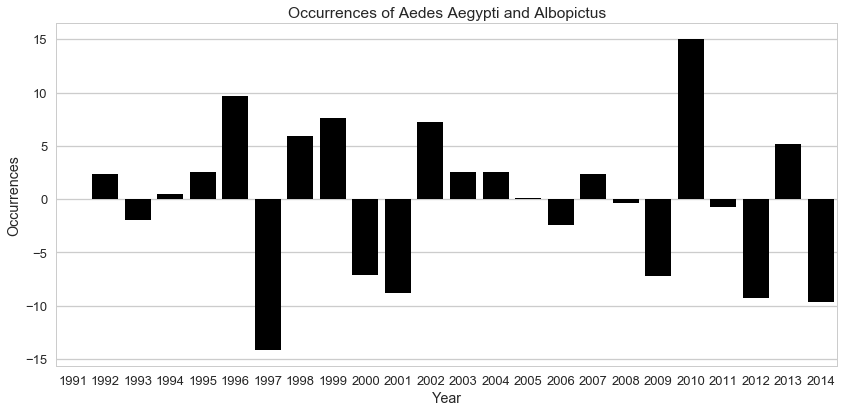

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", context="talk")

# Set up the matplotlib figure
f, (ax3) = plt.subplots(1, figsize=(12, 6), sharex=True)

# Label axes
barplot=sns.barplot(x=yearlyRain['Year'] ,y=yearlyRain['PrecVar'], color='black')
ax3.set_xlabel('Year')
ax3.set_ylabel('Occurrences')
ax3.set_title('Occurrences of Aedes Aegypti and Albopictus')

# Finalize the plot
plt.tight_layout(h_pad=2)

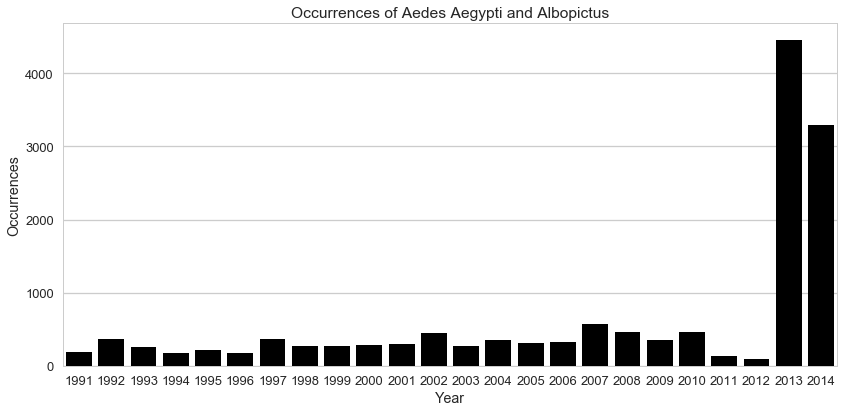

In [215]:
sns.set(style="whitegrid", context="talk")

# Set up the matplotlib figure
f, (ax3) = plt.subplots(1, figsize=(12, 6), sharex=True)

# Label axes
barplot=sns.barplot(x=yearlyOccurrences['Year'] ,y=yearlyOccurrences['Occurrences'], color='black')
ax3.set_xlabel('Year')
ax3.set_ylabel('Occurrences')
ax3.set_title('Occurrences of Aedes Aegypti and Albopictus')

# Finalize the plot
plt.tight_layout(h_pad=2)

## Map of Occurrences of the vector

In [111]:
# Latitude and Longitude of the countries
location['YEAR'] = pd.to_numeric(location['YEAR'], downcast='integer',errors='coerce')
location = location[['COUNTRY', 'X', 'Y','OCCURRENCE_ID', 'YEAR']]

In [112]:
loc = location.loc[(location['YEAR']>=1991) & (location['YEAR']<=2015)]
loc = loc.groupby(['COUNTRY'], as_index=False).agg({'OCCURRENCE_ID': 'count', 'X':"first", 'Y':"first"})
loc.rename(columns={'COUNTRY':'Entity', 'OCCURRENCE_ID':'Occurrences'}, inplace=True)
loc.head()

,Entity,Occurrences,X,Y
0,Afghanistan,1,69.17,34.53
1,Albania,8,20.38,42.19
2,Algeria,1,4.21,36.64
3,American Samoa,4,-170.72,-14.28
4,Antigua and Barbuda,1,-61.85,17.16


In [113]:
import folium
# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)

lOccurr = loc['Occurrences'].tolist()
 
# I can add marker one by one on the map
for i in range(0,len(loc)):
    folium.Circle(
        location=[loc.iloc[i]['Y'], loc.iloc[i]['X']],
        popup=loc.iloc[i]['Entity'],
        radius=lOccurr[i]*20,
        color="crimson",
        fill=True,
        fill_color='crimson'
    ).add_to(m)
 
# Save it as html
m.save('occurrences.html')

## Find the "riskiest" countries 

In [114]:
data['OccurByPop'] = np.divide(data['Occurrences'],data['PopTotal'])
data.head()

,Country,Year,Precipitation,Temperature,Occurrences,Entity,Urban (%),Rural (%),HDI,PopTotal,...,hdi_rate,pop_density_rate,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av,OccurByPop
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999,NaN,64.622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001,NaN,12993.657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998,NaN,12553.446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000,NaN,8.666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999,0.626,3275.431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
rateOccurrence = data.groupby(['Country'], as_index=False).agg({'OccurByPop': 'sum','Entity':'first'})
rateOccurrence.head()

,Country,OccurByPop,Entity
0,ABW,0.000000,Aruba
1,AFG,0.000041,Afghanistan
2,AGO,0.000000,Angola
3,AIA,0.000000,Anguilla
4,ALB,0.002589,Albania


In [116]:
import plotly
import plotly.plotly as py

#plotly.tools.set_credentials_file(username='rodolfo_saldanha', api_key='N3VNfm1F8od7XcZMTCBy')
plotly.tools.set_credentials_file(username='saldanha', api_key='5usztTPHLHlxIaL3YDFT')

map_ = [ dict(
        type = 'choropleth',
        locations = rateOccurrence['Country'],
        z = rateOccurrence['OccurByPop'],
        text = rateOccurrence['Entity'],
        colorscale = [[0,"rgb(0, 0, 0)"], [.5,"rgb(169,169,169)"],[0.9954,"rgb(90, 0, 0)"],[0.99897,"rgb(210, 0, 0)"],\
            [0.99994,"rgb(230, 0, 0)"],[0.99999999999999,"rgb(255, 0, 0)"],[1,"rgb(255, 255, 255)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                width = 0.5
            ) ),
        colorbar = dict(
            title = 'Cumulative rate')
      ) ]

layout = dict(
    title = 'Cumulative rate of number of mosquitos by person<br>in the timeframe 1991-2014',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=map_, layout=layout )
py.iplot( fig, validate=False, filename='vector-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~saldanha/0 or inside your plot.ly account where it is named 'vector-map'


## Find the Occurrences of Dengue

In [201]:
data.drop()

,Country,Year,Precipitation,Temperature,Occurrences,Entity,Urban (%),Rural (%),HDI,PopTotal,...,hdi_rate,pop_density_rate,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av,OccurByPop
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999,NaN,64.622,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001,NaN,12993.657,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998,NaN,12553.446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000,NaN,8.666,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999,0.626,3275.431,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,ARG,1991,52.792958,14.416431,0.0,Argentina,87.328,12.672000,0.713,33193.918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,ASM,1991,263.307917,26.879967,0.0,American Samoa,81.886,18.114000,NaN,48.375,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,ATG,1991,183.339717,26.413642,0.0,Antigua and Barbuda,35.465,64.535004,NaN,67.307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,AUS,1991,37.912953,22.172075,31.0,Australia,85.403,14.597000,0.867,17271.874,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001795
9,AUT,1991,94.343317,6.151395,0.0,Austria,62.689,37.311001,0.800,7772.701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [117]:
yearlyDengue = pd.DataFrame(data.groupby(['Year'])['Dengue'].sum()).reset_index()
yearlyDengue = yearlyDengue.loc[yearlyDengue['Year']<2015]
yearlyDengue.head()

,Year,Dengue
0,1991,87.0
1,1992,80.0
2,1993,78.0
3,1994,158.0
4,1995,208.0


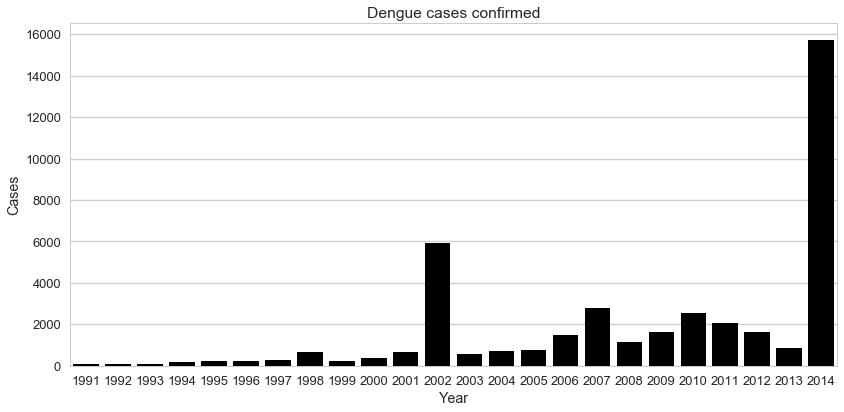

In [118]:
sns.set(style="whitegrid", context="talk")

# Set up the matplotlib figure
f, (ax3) = plt.subplots(1, figsize=(12, 6), sharex=True)

# Label axes
barplot=sns.barplot(x=yearlyDengue['Year'] ,y=yearlyDengue['Dengue'], color='black')
ax3.set_xlabel('Year')
ax3.set_ylabel('Cases')
ax3.set_title('Dengue cases confirmed')

# Finalize the plot
plt.tight_layout(h_pad=2)

## Name graph

In [119]:
#ensuring that data set includes only countires with occurrences
new_data = data.drop(data.loc[data.Occurrences == 0].index)

In [120]:
new_data.columns

Index(['Country', 'Year', 'Precipitation', 'Temperature', 'Occurrences',
       'Entity', 'Urban (%)', 'Rural (%)', 'HDI', 'PopTotal', 'Education',
       'Dengue', 'PopDens', 'DengueVar', 'OccurVar', 'PopTotalVar', 'PrecVar',
       'RuralVar', 'TempVar', 'UrbVar', 'edu_rate', 'hdi_rate',
       'pop_density_rate', 'pop_growth_rate', 'urban_rate', 'edu_mov_av',
       'hdi_mov_av', 'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av',
       'OccurByPop'],
      dtype='object')

In [121]:
# It doesn't make sense to keep Rural and Urban % at the same
new_data.drop(columns=['Rural (%)', 'RuralVar', 'Dengue','DengueVar', 'UrbVar'],inplace=True)

In [122]:
new_data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),HDI,PopTotal,Education,PopDens,OccurVar,...,hdi_rate,pop_density_rate,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av,OccurByPop
count,632.000000,632.000000,632.000000,632.000000,632.000000,554.000000,6.320000e+02,539.000000,632.000000,632.000000,...,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,6.320000e+02,632.000000,6.320000e+02
mean,2003.234177,176.713325,23.013697,61.971519,61.465783,0.685819,1.113005e+05,0.597124,252.615353,10.920886,...,0.007838,0.013607,0.013607,0.007253,0.474724,0.563357,224.127201,1.043747e+05,57.705906,5.271301e-03
std,6.077073,330.749796,12.924711,430.992062,23.260719,0.143969,2.580593e+05,0.169881,847.849144,332.244044,...,0.008602,0.010184,0.010184,0.009221,0.280957,0.290614,695.559482,2.517176e+05,26.700757,2.201189e-02
min,1991.000000,4.440862,-4.092638,1.000000,9.180000,0.336000,1.870200e+01,0.202000,1.468139,-3622.000000,...,-0.068702,-0.010895,-0.010895,-0.061677,0.000000,0.000000,0.000000,0.000000e+00,0.000000,7.746308e-07
25%,1998.000000,68.848996,20.632094,1.000000,42.093500,0.595000,5.827982e+03,0.483000,32.373492,-1.000000,...,0.002169,0.005768,0.005768,0.001564,0.312917,0.460667,26.540119,4.102844e+03,36.892167,6.075304e-05
50%,2004.000000,123.550737,24.778946,4.000000,67.132000,0.691500,2.345466e+04,0.610000,93.871325,1.000000,...,0.006807,0.012647,0.012647,0.004705,0.549333,0.658833,79.005851,2.165627e+04,62.564000,2.209841e-04
75%,2008.000000,173.776608,26.027319,12.000000,79.277750,0.785250,8.440126e+04,0.712000,246.701218,5.000000,...,0.012331,0.019320,0.019320,0.009993,0.661417,0.758750,236.529844,7.573077e+04,78.381167,8.749349e-04
max,2014.000000,2744.000000,185.419033,5527.000000,100.000000,0.932000,1.390110e+06,0.935000,11831.571906,5527.000000,...,0.074405,0.061456,0.061456,0.039733,0.931667,0.925333,7090.894762,1.382701e+06,100.000000,2.460559e-01


In [123]:
empty_data = new_data.loc[data['Education'].isna()]
complete_data = new_data.loc[~data['Education'].isna()]

In [124]:
complete_data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),HDI,PopTotal,Education,PopDens,OccurVar,...,hdi_rate,pop_density_rate,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av,OccurByPop
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02,539.000000,5.390000e+02
mean,2003.400742,120.931044,22.628630,25.955473,58.897796,0.680547,1.290350e+05,0.597124,223.122701,7.651206,...,0.009165,0.013202,0.013202,0.007965,0.556634,0.636210,213.927634,1.211288e+05,55.530785,1.138601e-03
std,6.045896,67.369186,13.912396,236.752843,22.672950,0.142369,2.754782e+05,0.169881,763.380541,197.086372,...,0.008030,0.009007,0.009007,0.009014,0.216573,0.212162,745.882906,2.689685e+05,25.785408,5.978615e-03
min,1991.000000,4.440862,-4.092638,1.000000,9.180000,0.336000,5.144500e+01,0.202000,2.248269,-1135.000000,...,-0.025559,-0.010895,-0.010895,-0.021419,0.000000,0.000000,0.000000,0.000000e+00,0.000000,7.746308e-07
25%,1999.000000,62.576382,18.149483,2.000000,40.063500,0.590000,1.098750e+04,0.483000,31.450549,-1.000000,...,0.004090,0.005976,0.005976,0.001922,0.442000,0.538500,25.991025,8.777394e+03,34.064000,4.891774e-05
50%,2004.000000,116.444237,24.626083,4.000000,60.742000,0.687000,3.295550e+04,0.610000,78.235472,1.000000,...,0.008208,0.012766,0.012766,0.004882,0.590000,0.675000,70.442506,2.711410e+04,56.131667,1.549068e-04
75%,2008.500000,152.986575,25.970288,12.000000,77.889500,0.778000,1.037113e+05,0.712000,195.884916,5.000000,...,0.013343,0.018838,0.018838,0.011599,0.694167,0.770500,194.518577,9.146218e+04,77.150500,4.712817e-04
max,2014.000000,316.279667,185.419033,4411.000000,100.000000,0.932000,1.390110e+06,0.935000,7248.931429,4411.000000,...,0.074405,0.045703,0.045703,0.037023,0.931667,0.925333,7090.894762,1.382701e+06,100.000000,1.175318e-01


## Normalize the data in order to apply SOM

In [125]:
max_denormalized = pd.DataFrame(complete_data.max())
min_denormalized = pd.DataFrame(complete_data.min())

In [126]:
max_denormalized.drop(['Country','Year','Entity','OccurByPop'], inplace=True)
min_denormalized.drop(['Country','Year','Entity','OccurByPop'], inplace=True)

In [127]:
# Function to minmax scaling a vector.
def minmax_s(x):
    mn, mx = x.min(), x.max()
    return (x - mn) / (mx - mn)

In [128]:
complete_data_final = complete_data.copy()
complete_data_final.drop(columns=['Entity', 'OccurByPop'],inplace=True)
complete_data.drop(columns=['Country', 'Year','Entity', 'OccurByPop'],inplace=True)

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [129]:
# We apply the minmax function to every column of new_data excluding country and year
for c in complete_data.columns:
    complete_data[c] = minmax_s(complete_data[c])
    
complete_data.head()

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Precipitation,Temperature,Occurrences,Urban (%),HDI,PopTotal,Education,PopDens,OccurVar,PopTotalVar,...,edu_rate,hdi_rate,pop_density_rate,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av
8,0.107338,0.138592,0.006803,0.839275,0.890940,0.012388,0.916780,0.000000,0.204652,0.008535,...,0.195565,0.255683,0.192496,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0
20,0.432726,0.154042,0.000227,0.721317,0.468121,0.109294,0.372442,0.002199,0.204652,0.008535,...,0.195565,0.255683,0.192496,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0
32,0.543335,0.151116,0.000000,0.669115,0.434564,0.025082,0.321965,0.004033,0.204652,0.008535,...,0.195565,0.255683,0.192496,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0
44,0.702656,0.149038,0.000680,0.365569,0.528523,0.000492,0.590723,0.005245,0.204652,0.008535,...,0.195565,0.255683,0.192496,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0
62,0.254710,0.149401,0.000000,0.182757,0.161074,0.638824,0.156889,0.040907,0.204652,0.008535,...,0.195565,0.255683,0.192496,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0


In [130]:
for c in complete_data_final.columns[2:]:
    complete_data_final[c] = minmax_s(complete_data_final[c])
    
complete_data_final.head()

,Country,Year,Precipitation,Temperature,Occurrences,Urban (%),HDI,PopTotal,Education,PopDens,...,edu_rate,hdi_rate,pop_density_rate,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av
8,AUS,1991,0.107338,0.138592,0.006803,0.839275,0.890940,0.012388,0.916780,0.000000,...,0.195565,0.255683,0.192496,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0
20,BRA,1991,0.432726,0.154042,0.000227,0.721317,0.468121,0.109294,0.372442,0.002199,...,0.195565,0.255683,0.192496,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0
32,COL,1991,0.543335,0.151116,0.000000,0.669115,0.434564,0.025082,0.321965,0.004033,...,0.195565,0.255683,0.192496,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0
44,FJI,1991,0.702656,0.149038,0.000680,0.365569,0.528523,0.000492,0.590723,0.005245,...,0.195565,0.255683,0.192496,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0
62,IND,1991,0.254710,0.149401,0.000000,0.182757,0.161074,0.638824,0.156889,0.040907,...,0.195565,0.255683,0.192496,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0


In [131]:
X = complete_data.values

In [132]:
complete_data.columns

Index(['Precipitation', 'Temperature', 'Occurrences', 'Urban (%)', 'HDI',
       'PopTotal', 'Education', 'PopDens', 'OccurVar', 'PopTotalVar',
       'PrecVar', 'TempVar', 'edu_rate', 'hdi_rate', 'pop_density_rate',
       'pop_growth_rate', 'urban_rate', 'edu_mov_av', 'hdi_mov_av',
       'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av'],
      dtype='object')

In [133]:
complete_data_final.columns

Index(['Country', 'Year', 'Precipitation', 'Temperature', 'Occurrences',
       'Urban (%)', 'HDI', 'PopTotal', 'Education', 'PopDens', 'OccurVar',
       'PopTotalVar', 'PrecVar', 'TempVar', 'edu_rate', 'hdi_rate',
       'pop_density_rate', 'pop_growth_rate', 'urban_rate', 'edu_mov_av',
       'hdi_mov_av', 'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av'],
      dtype='object')

## Self organizing maps (SOM)

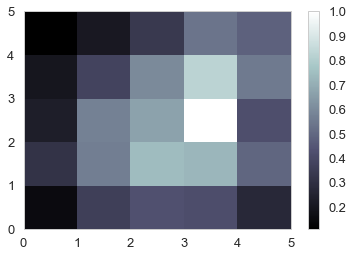

In [134]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 5, y = 5 , input_len = 22, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [135]:
distance_matrix=som.distance_map()
distance_matrix

array([[0.15624   , 0.31276137, 0.22927977, 0.20026986, 0.11116921],
       [0.36175057, 0.56429273, 0.57355373, 0.37951123, 0.20850456],
       [0.42783315, 0.74322396, 0.66866977, 0.59999501, 0.34022372],
       [0.41783109, 0.72682551, 1.        , 0.82330994, 0.53581913],
       [0.27403901, 0.49639645, 0.42116856, 0.55479292, 0.48161847]])

In [136]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(3,
              2): [array([0.1073378 , 0.13859153, 0.00680272, 0.83927549, 0.8909396 ,
                     0.01238827, 0.91678035, 0.        , 0.204652  , 0.00853514,
                     0.45337734, 0.40647284, 0.19556452, 0.25568344, 0.19249621,
                     0.19249621, 0.36650576, 0.        , 0.        , 0.        ,
                     0.        , 0.        ]), array([4.32725559e-01, 1.54041990e-01, 2.26757370e-04, 7.21316891e-01,
                     4.68120805e-01, 1.09294021e-01, 3.72442019e-01, 2.19890851e-03,
                     2.04652001e-01, 8.53513949e-03, 4.53377340e-01, 4.06472840e-01,
                     1.95564516e-01, 2.55683440e-01, 1.92496207e-01, 1.92496207e-01,
                     3.66505762e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                     0.00000000e+00, 0.00000000e+00]), array([0.54333463, 0.15111614, 0.        , 0.66911473, 0.43456376,
                     0.0250819 , 0.32196453, 0.00403253,

In [137]:
## Create a dataframe
labels = pd.DataFrame.from_dict(mappings, orient='index')
labels.index.names = ['coor']
labels.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
coor,,,,,,,,,,,,,,,,,,,,,
"(3, 2)","[0.10733779884380167, 0.1385915342434977, 0.00...","[0.43272555894362785, 0.1540419898324116, 0.00...","[0.5433346285627032, 0.15111613662001097, 0.0,...","[0.7026563122963917, 0.1490382962604335, 0.000...","[0.2242468274173651, 0.08323606506452377, 0.00...","[0.1897915259717584, 0.13250307898801975, 0.0,...","[0.7178093334626559, 0.15701572927746588, 0.0,...","[0.3606579777669053, 0.1640062397915808, 0.000...","[0.4072493623942702, 0.15997179171101714, 0.0,...","[0.16891765380973478, 0.06145993488193511, 0.0...",...,None,None,None,None,None,None,None,None,None,None
"(4, 4)","[0.2547101892774115, 0.14940093883223707, 0.0,...","[0.22949756105962496, 0.14884266187193415, 0.0...","[0.2500511609142934, 0.15003744316434053, 0.00...","[0.14252910020432166, 0.05859532240067923, 0.0...","[0.29289143016504793, 0.14949336937497157, 0.0...","[0.27057859340335205, 0.15018857721542447, 0.0...","[0.1429844957423449, 0.055406420306408036, 0.0...","[0.2592056395376175, 0.15061581563274515, 0.00...","[0.13586339673116105, 0.057880867724567506, 0....","[0.2605887472872102, 0.14811390288775794, 0.01...",...,None,None,None,None,None,None,None,None,None,None
"(4, 2)","[0.2819829737620985, 0.08516652224137858, 0.0,...","[0.7027000314652417, 0.1592518712325924, 0.002...","[0.341539700138612, 0.16182691052019021, 0.0, ...","[0.8118894573642768, 0.15928559826697744, 0.00...","[0.41178244160414446, 0.1615926241587776, 0.00...","[0.49893444547131344, 0.14890602648281917, 0.0...","[0.8151352582496783, 0.16204202479947521, 0.00...","[0.459386956506228, 0.15530343368561034, 0.012...","[0.5851979507628361, 0.14984598617905703, 0.00...","[0.4518758643371208, 0.16079724658647454, 0.00...",...,None,None,None,None,None,None,None,None,None,None
"(4, 0)","[0.703555975828484, 0.15474761919457147, 0.000...","[0.32728483798781033, 0.16087855204485513, 0.0...","[0.04955880450681031, 0.1295004978717098, 0.00...","[0.09992233033111005, 0.1280199558157381, 0.0,...","[0.16083451929818496, 0.17096350697063048, 0.0...","[0.16265143023345946, 0.17278045750621004, 0.0...","[0.30683542123318985, 0.1619966450087511, 0.0,...","[0.21549589061859462, 0.17025031431001658, 0.0...","[0.18690768292640722, 0.17152969901071086, 0.0...","[0.3940059710069491, 0.15979370241602447, 0.00...",...,None,None,None,None,None,None,None,None,None,None
"(1, 0)","[0.4398864701906019, 0.15364460885491812, 0.00...","[0.1900486780610062, 0.13335548910738593, 0.00...","[0.47369902502913064, 0.15420825048040357, 0.0...","[0.4627220663539134, 0.15546951844294057, 0.00...","[0.7212756275400996, 0.15138058822990874, 0.00...","[0.46846450970201436, 0.1541086963658694, 0.00...","[0.41240734245269056, 0.12298545939162604, 0.0...","[0.7388044220977256, 0.16767122953719923, 0.00...","[0.4656185681830568, 0.15577948176155867, 0.00...","[0.6215592850435426, 0.151328700484701, 0.0002...",...,"[0.7515281967327324, 0.15044902731276805, 0.00...","[0.5784468131926013, 0.1555887283389221, 0.009...","[0.5654881682794635, 0.15866224176183766, 0.00...","[0.8384541970822985, 0.14917742577385493, 0.00...","[0.7259462831711678, 0.1677575478794389, 0.002...","[0.5666382817201511, 0.15719799597567444, 0.00...","[0.3062572004849783, 0.1316620138163346, 0.0, ...","[0.7981312006110849, 0.15273978331835902, 0.00...","[0.6335812013346158, 0.15965883825114974, 0.00...","[0.8331814408440432, 0.151587963320078, 0.0004..."


In [138]:
labels=labels.reset_index()
labels.coor = labels.coor.astype(str)
labels[['coor_1','coor_2']] = labels.coor.str.split(",", n=1, expand=True)
labels['coor_1'] = labels['coor_1'].str.replace("(","")
labels['coor_2'] = labels['coor_2'].str.replace(")","")
labels.sort_values(by=['coor_1', 'coor_2'], inplace=True)
labels.drop('coor', axis=1, inplace=True)
labels = pd.melt(labels, id_vars=['coor_1', 'coor_2'])
labels=labels.dropna()
labels.head()

,coor_1,coor_2,variable,value
0,0,0,0,"[0.40025507035131797, 0.1576161760239165, 0.00..."
1,0,1,0,"[0.22096914574440993, 0.08521353781525665, 0.0..."
2,0,2,0,"[0.23330409769801874, 0.08457217010635656, 0.0..."
3,0,3,0,"[0.1675437067759621, 0.13420240264357333, 0.00..."
4,0,4,0,"[0.17510255331837912, 0.05896765654794367, 0.0..."


In [139]:
values = labels['value'].apply(pd.Series)

In [140]:
col = ['Precipitation', 'Temperature', 'Occurrences', 'Urban (%)', 'HDI',
       'PopTotal', 'Education', 'PopDens', 'OccurVar', 'PopTotalVar',
       'PrecVar', 'TempVar', 'edu_rate', 'hdi_rate', 'pop_density_rate',
       'pop_growth_rate', 'urban_rate', 'edu_mov_av', 'hdi_mov_av',
       'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av']
values.columns = col

In [141]:
labels.columns

Index(['coor_1', 'coor_2', 'variable', 'value'], dtype='object')

In [142]:
labeledData = pd.concat([labels.iloc[:,0:3],labels['value'].apply(pd.Series)],axis=1)
labeledData.head()

,coor_1,coor_2,variable,0,1,2,3,4,5,6,...,12,13,14,15,16,17,18,19,20,21
0,0,0,0,0.400255,0.157616,0.000680,0.716769,0.533557,0.007809,0.571623,...,0.207570,0.286369,0.282801,0.282801,0.401131,0.670125,0.706772,0.014376,0.007847,0.741270
1,0,1,0,0.220969,0.085214,0.001587,0.634464,0.755034,0.041131,0.585266,...,0.261489,0.332634,0.204162,0.204162,0.381888,0.665474,0.842939,0.027420,0.041361,0.667500
2,0,2,0,0.233304,0.084572,0.000000,0.635785,0.778523,0.041152,0.619372,...,0.247252,0.331278,0.193677,0.193677,0.381861,0.691950,0.857349,0.027446,0.041400,0.668620
3,0,3,0,0.167544,0.134202,0.000907,0.826415,0.942953,0.013679,0.945430,...,0.195565,0.289215,0.381437,0.381437,0.339127,0.960644,0.967219,0.000346,0.013644,0.843693
4,0,4,0,0.175103,0.058968,0.040816,0.741114,0.897651,0.187020,0.896317,...,0.234907,0.301836,0.368590,0.368590,0.454425,0.911986,0.936239,0.003970,0.186218,0.760953


In [143]:
col = ['coor_1','coor_2','variable','Precipitation', 'Temperature', 'Occurrences', 'Urban (%)', 'HDI',
       'PopTotal', 'Education', 'PopDens', 'OccurVar', 'PopTotalVar',
       'PrecVar', 'TempVar', 'edu_rate', 'hdi_rate', 'pop_density_rate',
       'pop_growth_rate', 'urban_rate', 'edu_mov_av', 'hdi_mov_av',
       'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av']
labeledData.columns = col

In [144]:
labeledData.head()

,coor_1,coor_2,variable,Precipitation,Temperature,Occurrences,Urban (%),HDI,PopTotal,Education,...,edu_rate,hdi_rate,pop_density_rate,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av
0,0,0,0,0.400255,0.157616,0.000680,0.716769,0.533557,0.007809,0.571623,...,0.207570,0.286369,0.282801,0.282801,0.401131,0.670125,0.706772,0.014376,0.007847,0.741270
1,0,1,0,0.220969,0.085214,0.001587,0.634464,0.755034,0.041131,0.585266,...,0.261489,0.332634,0.204162,0.204162,0.381888,0.665474,0.842939,0.027420,0.041361,0.667500
2,0,2,0,0.233304,0.084572,0.000000,0.635785,0.778523,0.041152,0.619372,...,0.247252,0.331278,0.193677,0.193677,0.381861,0.691950,0.857349,0.027446,0.041400,0.668620
3,0,3,0,0.167544,0.134202,0.000907,0.826415,0.942953,0.013679,0.945430,...,0.195565,0.289215,0.381437,0.381437,0.339127,0.960644,0.967219,0.000346,0.013644,0.843693
4,0,4,0,0.175103,0.058968,0.040816,0.741114,0.897651,0.187020,0.896317,...,0.234907,0.301836,0.368590,0.368590,0.454425,0.911986,0.936239,0.003970,0.186218,0.760953


In [145]:
complete_data_final.columns

Index(['Country', 'Year', 'Precipitation', 'Temperature', 'Occurrences',
       'Urban (%)', 'HDI', 'PopTotal', 'Education', 'PopDens', 'OccurVar',
       'PopTotalVar', 'PrecVar', 'TempVar', 'edu_rate', 'hdi_rate',
       'pop_density_rate', 'pop_growth_rate', 'urban_rate', 'edu_mov_av',
       'hdi_mov_av', 'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av'],
      dtype='object')

In [146]:
labeledData.columns

Index(['coor_1', 'coor_2', 'variable', 'Precipitation', 'Temperature',
       'Occurrences', 'Urban (%)', 'HDI', 'PopTotal', 'Education', 'PopDens',
       'OccurVar', 'PopTotalVar', 'PrecVar', 'TempVar', 'edu_rate', 'hdi_rate',
       'pop_density_rate', 'pop_growth_rate', 'urban_rate', 'edu_mov_av',
       'hdi_mov_av', 'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av'],
      dtype='object')

In [147]:
labeledCompleteData=pd.merge(complete_data_final, labeledData, how='left',
           left_on=['Precipitation', 'Temperature',
       'Occurrences', 'Urban (%)', 'HDI', 'PopTotal', 'Education', 'PopDens',
       'OccurVar', 'PopTotalVar', 'PrecVar', 'TempVar', 'edu_rate', 'hdi_rate',
       'pop_density_rate', 'pop_growth_rate', 'urban_rate', 'edu_mov_av',
       'hdi_mov_av', 'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av'],
           right_on=['Precipitation', 'Temperature',
       'Occurrences', 'Urban (%)', 'HDI', 'PopTotal', 'Education', 'PopDens',
       'OccurVar', 'PopTotalVar', 'PrecVar', 'TempVar', 'edu_rate', 'hdi_rate',
       'pop_density_rate', 'pop_growth_rate', 'urban_rate', 'edu_mov_av',
       'hdi_mov_av', 'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av'])

labeledCompleteData.head()

,Country,Year,Precipitation,Temperature,Occurrences,Urban (%),HDI,PopTotal,Education,PopDens,...,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av,coor_1,coor_2,variable
0,AUS,1991,0.107338,0.138592,0.006803,0.839275,0.890940,0.012388,0.916780,0.000000,...,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0,3,2,0
1,BRA,1991,0.432726,0.154042,0.000227,0.721317,0.468121,0.109294,0.372442,0.002199,...,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0,3,2,1
2,COL,1991,0.543335,0.151116,0.000000,0.669115,0.434564,0.025082,0.321965,0.004033,...,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0,3,2,2
3,FJI,1991,0.702656,0.149038,0.000680,0.365569,0.528523,0.000492,0.590723,0.005245,...,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0,3,2,3
4,IND,1991,0.254710,0.149401,0.000000,0.182757,0.161074,0.638824,0.156889,0.040907,...,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0,4,4,0


In [148]:
labeledCompleteData.head()

,Country,Year,Precipitation,Temperature,Occurrences,Urban (%),HDI,PopTotal,Education,PopDens,...,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av,coor_1,coor_2,variable
0,AUS,1991,0.107338,0.138592,0.006803,0.839275,0.890940,0.012388,0.916780,0.000000,...,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0,3,2,0
1,BRA,1991,0.432726,0.154042,0.000227,0.721317,0.468121,0.109294,0.372442,0.002199,...,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0,3,2,1
2,COL,1991,0.543335,0.151116,0.000000,0.669115,0.434564,0.025082,0.321965,0.004033,...,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0,3,2,2
3,FJI,1991,0.702656,0.149038,0.000680,0.365569,0.528523,0.000492,0.590723,0.005245,...,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0,3,2,3
4,IND,1991,0.254710,0.149401,0.000000,0.182757,0.161074,0.638824,0.156889,0.040907,...,0.192496,0.366506,0.0,0.0,0.0,0.0,0.0,4,4,0


In [149]:
labeledDenormalized = labeledCompleteData.copy()

In [150]:
labeledCompleteData.columns

Index(['Country', 'Year', 'Precipitation', 'Temperature', 'Occurrences',
       'Urban (%)', 'HDI', 'PopTotal', 'Education', 'PopDens', 'OccurVar',
       'PopTotalVar', 'PrecVar', 'TempVar', 'edu_rate', 'hdi_rate',
       'pop_density_rate', 'pop_growth_rate', 'urban_rate', 'edu_mov_av',
       'hdi_mov_av', 'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av',
       'coor_1', 'coor_2', 'variable'],
      dtype='object')

In [151]:
labeledCompleteData.columns[2:24]

Index(['Precipitation', 'Temperature', 'Occurrences', 'Urban (%)', 'HDI',
       'PopTotal', 'Education', 'PopDens', 'OccurVar', 'PopTotalVar',
       'PrecVar', 'TempVar', 'edu_rate', 'hdi_rate', 'pop_density_rate',
       'pop_growth_rate', 'urban_rate', 'edu_mov_av', 'hdi_mov_av',
       'pop_density_mov_av', 'pop_mov_av', 'urban_mov_av'],
      dtype='object')

In [152]:
for c in labeledCompleteData.columns[2:24]:
    labeledDenormalized[c] = (labeledCompleteData[c]*
                              (max_denormalized.loc[c,0] - min_denormalized.loc[c,0]) + 
                                min_denormalized.loc[c,0])
    
labeledDenormalized.head()

,Country,Year,Precipitation,Temperature,Occurrences,Urban (%),HDI,PopTotal,Education,PopDens,...,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av,coor_1,coor_2,variable
0,AUS,1991,37.912953,22.172075,31.0,85.403,0.867,17271.874,0.874,2.248269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,0
1,BRA,1991,139.381483,25.100117,2.0,74.690,0.615,151976.577,0.475,18.183062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,1
2,COL,1991,173.873683,24.545633,1.0,69.949,0.595,34916.766,0.438,31.470722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,2
3,FJI,1991,223.556367,24.151858,4.0,42.381,0.651,735.473,0.635,40.255774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,3
4,IND,1991,83.869383,24.220583,1.0,25.778,0.432,888054.875,0.317,298.687563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0


## Mapping the dangerous regions

In [153]:
meanOccurrences = labeledDenormalized.Occurrences.mean()
outbreaks = labeledDenormalized.loc[labeledDenormalized['Occurrences']>meanOccurrences]

In [154]:
outbreaks.reset_index(drop = True, inplace = True)

In [155]:
labeledDenormalized['beforeOutbreak'] = 0
labeledDenormalized['outbreak'] = 0

In [156]:
labeledDenormalized['outbreak'].loc[labeledDenormalized['Occurrences']>meanOccurrences] = 1

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [157]:
# Mark the row in which the year and country happened to have the number of
# occurrences above the mean in the following year
for i in range(0, len(outbreaks)):
    for j in range(0, len(labeledDenormalized)):
        if ((labeledDenormalized.iloc[j,1]  == outbreaks.iloc[i,1] - 1) &
        (labeledDenormalized.iloc[j,0] == outbreaks.iloc[i,0])):
            labeledDenormalized.iloc[j,27] = 1

In [158]:
labeledDenormalized['outbreak'].sum()

67

In [159]:
labeledDenormalized.head()

,Country,Year,Precipitation,Temperature,Occurrences,Urban (%),HDI,PopTotal,Education,PopDens,...,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av,coor_1,coor_2,variable,beforeOutbreak,outbreak
0,AUS,1991,37.912953,22.172075,31.0,85.403,0.867,17271.874,0.874,2.248269,...,0.0,0.0,0.0,0.0,0.0,3,2,0,1,1
1,BRA,1991,139.381483,25.100117,2.0,74.690,0.615,151976.577,0.475,18.183062,...,0.0,0.0,0.0,0.0,0.0,3,2,1,0,0
2,COL,1991,173.873683,24.545633,1.0,69.949,0.595,34916.766,0.438,31.470722,...,0.0,0.0,0.0,0.0,0.0,3,2,2,0,0
3,FJI,1991,223.556367,24.151858,4.0,42.381,0.651,735.473,0.635,40.255774,...,0.0,0.0,0.0,0.0,0.0,3,2,3,0,0
4,IND,1991,83.869383,24.220583,1.0,25.778,0.432,888054.875,0.317,298.687563,...,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0


In [160]:
matrix = pd.DataFrame(np.zeros((5, 5)))
matrix

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [161]:
float(labeledDenormalized.iloc[i,24])

2.0

In [162]:
matrix.iloc[int(labeledDenormalized.iloc[i,24]), int(labeledDenormalized.iloc[i,25])]

0.0

In [163]:
for i in range(0, len(labeledDenormalized)):
    matrix.iloc[int(labeledDenormalized.iloc[i,24]), int(labeledDenormalized.iloc[i,25])]+=labeledDenormalized.iloc[i,27]
matrix

,0,1,2,3,4
0,7.0,1.0,0.0,0.0,12.0
1,6.0,0.0,0.0,0.0,0.0
2,0.0,2.0,0.0,0.0,7.0
3,1.0,0.0,3.0,3.0,0.0
4,0.0,0.0,3.0,7.0,5.0


Text(0.5,1,'Points that moved towards outbreaks areas')

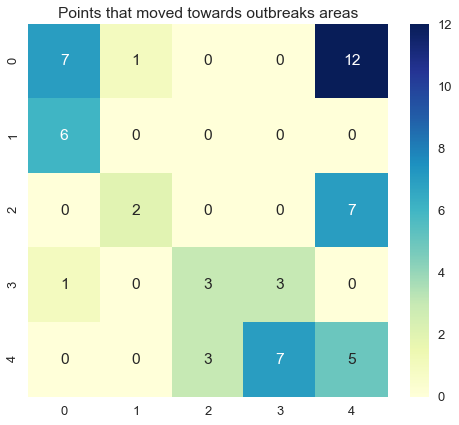

In [164]:
f, (ax3) = plt.subplots(1, figsize=(7, 6), sharex=True)

matrix = matrix.astype(int)
# Label axes
p=sns.heatmap(matrix,  annot=True, fmt="d", cmap="YlGnBu")

# Finalize the plot
plt.tight_layout(h_pad=2)
ax3.set_title('Points that moved towards outbreaks areas')

In [165]:
total = pd.DataFrame(labeledDenormalized.groupby(['coor_1','coor_2'])['beforeOutbreak'].count()).reset_index()
total.head()

,coor_1,coor_2,beforeOutbreak
0,0,0,24
1,0,1,23
2,0,2,24
3,0,3,20
4,0,4,25


In [166]:
out = pd.DataFrame(labeledDenormalized.groupby(['coor_1','coor_2'])['beforeOutbreak'].sum()).reset_index()
out.head()

,coor_1,coor_2,beforeOutbreak
0,0,0,7
1,0,1,1
2,0,2,0
3,0,3,0
4,0,4,12


In [167]:
mergedOutbreaks = pd.merge(total, out, how='left', left_on=['coor_1','coor_2'], right_on = ['coor_1','coor_2'])
mergedOutbreaks.rename(columns={'beforeOutbreak_x':'Total', 'beforeOutbreak_y':'moveToOutbreak'}, inplace=True)
mergedOutbreaks.head()

,coor_1,coor_2,Total,moveToOutbreak
0,0,0,24,7
1,0,1,23,1
2,0,2,24,0
3,0,3,20,0
4,0,4,25,12


In [168]:
mergedOutbreaks['Percentage'] = np.divide(mergedOutbreaks['moveToOutbreak'],mergedOutbreaks['Total'])
mergedOutbreaks['Percentage'] = mergedOutbreaks['Percentage'] * 100
mergedOutbreaks.head()

,coor_1,coor_2,Total,moveToOutbreak,Percentage
0,0,0,24,7,29.166667
1,0,1,23,1,4.347826
2,0,2,24,0,0.000000
3,0,3,20,0,0.000000
4,0,4,25,12,48.000000


In [169]:
for i in range(0, len(mergedOutbreaks)):
    matrix.iloc[int(mergedOutbreaks.iloc[i,0]), int(mergedOutbreaks.iloc[i,1])]=mergedOutbreaks.iloc[i,4]
matrix = matrix.astype(float)
matrix

,0,1,2,3,4
0,29.166667,4.347826,0.000000,0.000000,48.000000
1,11.538462,0.000000,0.000000,0.000000,0.000000
2,0.000000,4.878049,0.000000,0.000000,20.000000
3,3.030303,0.000000,12.000000,42.857143,0.000000
4,0.000000,0.000000,10.714286,36.842105,15.151515


Text(0.5,1,'Probability of points moving towards outbreaks areas')

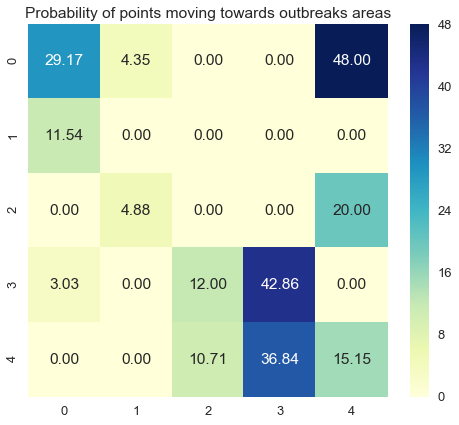

In [170]:
f, (ax3) = plt.subplots(1, figsize=(7, 6), sharex=True)

# Label axes
p=sns.heatmap(matrix,  annot=True, fmt=".2f", cmap="YlGnBu")

# Finalize the plot
plt.tight_layout(h_pad=2)
ax3.set_title('Probability of points moving towards outbreaks areas')

In [171]:
labeledDenormalized.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),HDI,PopTotal,Education,PopDens,OccurVar,...,pop_density_rate,pop_growth_rate,urban_rate,edu_mov_av,hdi_mov_av,pop_density_mov_av,pop_mov_av,urban_mov_av,beforeOutbreak,outbreak
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02,539.000000,539.000000,539.000000
mean,2003.400742,120.931044,22.628630,25.955473,58.897796,0.680547,1.290350e+05,0.597124,223.122701,7.651206,...,0.013202,0.013202,0.007965,0.556634,0.636210,213.927634,1.211288e+05,55.530785,0.105751,0.124304
std,6.045896,67.369186,13.912396,236.752843,22.672950,0.142369,2.754782e+05,0.169881,763.380541,197.086372,...,0.009007,0.009007,0.009014,0.216573,0.212162,745.882906,2.689685e+05,25.785408,0.307805,0.330235
min,1991.000000,4.440862,-4.092638,1.000000,9.180000,0.336000,5.144500e+01,0.202000,2.248269,-1135.000000,...,-0.010895,-0.010895,-0.021419,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1999.000000,62.576382,18.149483,2.000000,40.063500,0.590000,1.098750e+04,0.483000,31.450549,-1.000000,...,0.005976,0.005976,0.001922,0.442000,0.538500,25.991025,8.777394e+03,34.064000,0.000000,0.000000
50%,2004.000000,116.444237,24.626083,4.000000,60.742000,0.687000,3.295550e+04,0.610000,78.235472,1.000000,...,0.012766,0.012766,0.004882,0.590000,0.675000,70.442506,2.711410e+04,56.131667,0.000000,0.000000
75%,2008.500000,152.986575,25.970287,12.000000,77.889500,0.778000,1.037113e+05,0.712000,195.884916,5.000000,...,0.018838,0.018838,0.011599,0.694167,0.770500,194.518577,9.146218e+04,77.150500,0.000000,0.000000
max,2014.000000,316.279667,185.419033,4411.000000,100.000000,0.932000,1.390110e+06,0.935000,7248.931429,4411.000000,...,0.045703,0.045703,0.037023,0.931667,0.925333,7090.894762,1.382701e+06,100.000000,1.000000,1.000000


## Heatmap of the average of clustered point's variables

In [172]:
#Adjust temperature
for i in range(0,len(labeledDenormalized)):
    if(labeledDenormalized.iloc[i,3]>30):
        labeledDenormalized.iloc[i,3] = labeledDenormalized.iloc[i,3]/5

In [173]:
clusteredTemp = pd.DataFrame(labeledDenormalized.groupby(['coor_1','coor_2'])['Temperature'].mean()).reset_index()
clusteredTemp.head()

,coor_1,coor_2,Temperature
0,0,0,23.563345
1,0,1,18.289781
2,0,2,12.717632
3,0,3,12.285959
4,0,4,9.241467


In [174]:
for i in range(0, len(clusteredTemp)):
    matrix.iloc[int(clusteredTemp.iloc[i,0]), int(clusteredTemp.iloc[i,1])]=clusteredTemp.iloc[i,2]
matrix = matrix.astype(float)
matrix

,0,1,2,3,4
0,23.563345,18.289781,12.717632,12.285959,9.241467
1,24.526929,26.194750,23.718084,11.927230,17.990345
2,23.527757,23.364128,24.752677,25.789500,20.686927
3,25.433666,25.393060,20.412222,24.288828,0.000000
4,26.045463,26.414671,24.500619,25.952497,18.203611


Text(0.5,1,'Average Temperature')

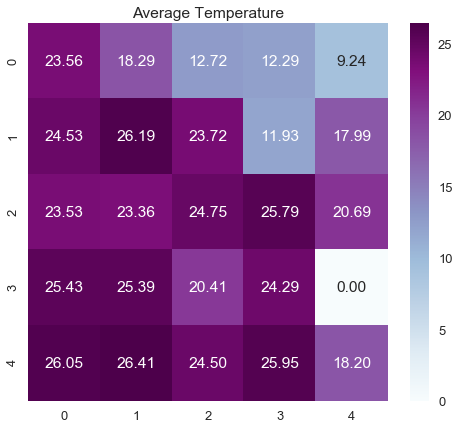

In [175]:
f, (ax3) = plt.subplots(1, figsize=(7, 6), sharex=True)

# Label axes
p=sns.heatmap(matrix,  annot=True, fmt=".2f", cmap="BuPu")

# Finalize the plot
plt.tight_layout(h_pad=2)
ax3.set_title('Average Temperature')

In [176]:
clusteredPrec = pd.DataFrame(labeledDenormalized.groupby(['coor_1','coor_2'])['Precipitation'].mean()).reset_index()
clusteredPrec.head()

,coor_1,coor_2,Precipitation
0,0,0,143.845691
1,0,1,119.093630
2,0,2,90.587374
3,0,3,60.517393
4,0,4,53.701668


In [177]:
clustering = pd.merge(clusteredTemp,clusteredPrec,
                   how='inner',
                   left_on = ['coor_1','coor_2'],
                   right_on = ['coor_1','coor_2'])
clustering.head()

,coor_1,coor_2,Temperature,Precipitation
0,0,0,23.563345,143.845691
1,0,1,18.289781,119.093630
2,0,2,12.717632,90.587374
3,0,3,12.285959,60.517393
4,0,4,9.241467,53.701668


In [178]:
for i in range(0, len(clusteredPrec)):
    matrix.iloc[int(clusteredPrec.iloc[i,0]), int(clusteredPrec.iloc[i,1])]=clusteredPrec.iloc[i,2]
matrix = matrix.astype(float)
matrix

,0,1,2,3,4
0,143.845691,119.093630,90.587374,60.517393,53.701668
1,178.189468,149.526739,135.591140,80.271237,42.625487
2,143.992342,217.576020,156.131537,101.479508,52.137127
3,112.325544,192.533945,115.539265,131.052080,0.000000
4,72.973677,169.493632,151.750697,226.637581,71.057234


Text(0.5,1,'Average Precipitation')

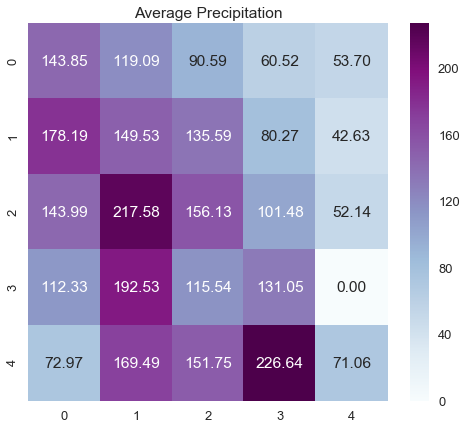

In [179]:
f, (ax3) = plt.subplots(1, figsize=(7, 6), sharex=True)

# Label axes
p=sns.heatmap(matrix,  annot=True, fmt=".2f", cmap="BuPu")

# Finalize the plot
plt.tight_layout(h_pad=2)
ax3.set_title('Average Precipitation')

In [180]:
clusteredUrb = pd.DataFrame(labeledDenormalized.groupby(['coor_1','coor_2'])['Urban (%)'].mean()).reset_index()
clusteredUrb.head()

,coor_1,coor_2,Urban (%)
0,0,0,79.517958
1,0,1,78.790000
2,0,2,64.666833
3,0,3,78.086050
4,0,4,80.002880


In [181]:
clustering = pd.merge(clustering,clusteredUrb,
                   how='inner',
                   left_on = ['coor_1','coor_2'],
                   right_on = ['coor_1','coor_2'])
clustering.head()

,coor_1,coor_2,Temperature,Precipitation,Urban (%)
0,0,0,23.563345,143.845691,79.517958
1,0,1,18.289781,119.093630,78.790000
2,0,2,12.717632,90.587374,64.666833
3,0,3,12.285959,60.517393,78.086050
4,0,4,9.241467,53.701668,80.002880


In [182]:
for i in range(0, len(clusteredUrb)):
    matrix.iloc[int(clusteredUrb.iloc[i,0]), int(clusteredUrb.iloc[i,1])]=clusteredUrb.iloc[i,2]
matrix = matrix.astype(float)
matrix

,0,1,2,3,4
0,79.517958,78.790000,64.666833,78.086050,80.002880
1,79.942904,63.422867,40.419056,70.663000,88.416125
2,62.654667,57.282512,30.094667,76.227000,78.100171
3,38.426273,43.404750,62.047320,41.490714,0.000000
4,32.855474,24.560750,28.596500,42.425789,32.756515


Text(0.5,1,'Average Urbanization (%)')

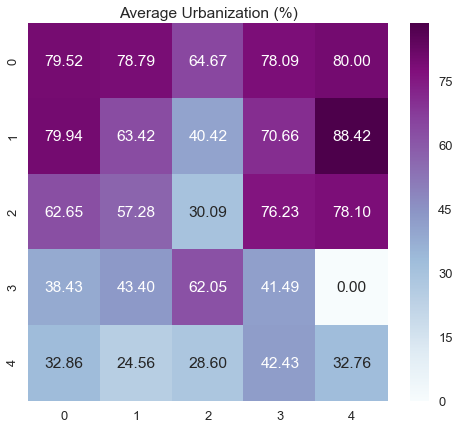

In [183]:
f, (ax3) = plt.subplots(1, figsize=(7, 6), sharex=True)

# Label axes
p=sns.heatmap(matrix,  annot=True, fmt=".2f", cmap="BuPu")

# Finalize the plot
plt.tight_layout(h_pad=2)
ax3.set_title('Average Urbanization (%)')

In [184]:
clusteredHDI = pd.DataFrame(labeledDenormalized.groupby(['coor_1','coor_2'])['HDI'].mean()).reset_index()
clusteredHDI.head()

,coor_1,coor_2,HDI
0,0,0,0.705500
1,0,1,0.779870
2,0,2,0.815125
3,0,3,0.870200
4,0,4,0.896240


In [185]:
clustering = pd.merge(clustering,clusteredHDI,
                   how='inner',
                   left_on = ['coor_1','coor_2'],
                   right_on = ['coor_1','coor_2'])
clustering.head()

,coor_1,coor_2,Temperature,Precipitation,Urban (%),HDI
0,0,0,23.563345,143.845691,79.517958,0.705500
1,0,1,18.289781,119.093630,78.790000,0.779870
2,0,2,12.717632,90.587374,64.666833,0.815125
3,0,3,12.285959,60.517393,78.086050,0.870200
4,0,4,9.241467,53.701668,80.002880,0.896240


In [186]:
for i in range(0, len(clusteredHDI)):
    matrix.iloc[int(clusteredHDI.iloc[i,0]), int(clusteredHDI.iloc[i,1])]=clusteredHDI.iloc[i,2]
matrix = matrix.astype(float)
matrix

,0,1,2,3,4
0,0.705500,0.779870,0.815125,0.870200,0.896240
1,0.691788,0.734200,0.770167,0.860250,0.848250
2,0.605000,0.677951,0.703889,0.753000,0.729743
3,0.474152,0.576500,0.701600,0.704714,0.000000
4,0.436237,0.492083,0.588429,0.628263,0.551545


Text(0.5,1,'Average Human Development Index (HDI)')

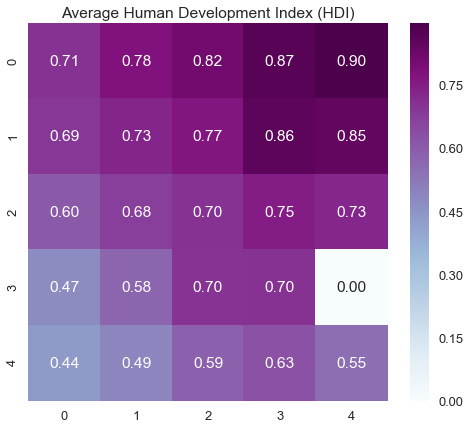

In [187]:
f, (ax3) = plt.subplots(1, figsize=(7, 6), sharex=True)

# Label axes
p=sns.heatmap(matrix,  annot=True, fmt=".2f", cmap="BuPu")

# Finalize the plot
plt.tight_layout(h_pad=2)
ax3.set_title('Average Human Development Index (HDI)')

In [188]:
clusteredEducation = pd.DataFrame(labeledDenormalized.groupby(['coor_1','coor_2'])['Education'].mean()).reset_index()
clusteredEducation.head()

,coor_1,coor_2,Education
0,0,0,0.628667
1,0,1,0.723565
2,0,2,0.758375
3,0,3,0.828850
4,0,4,0.878440


In [189]:
clustering = pd.merge(clustering,clusteredEducation,
                   how='inner',
                   left_on = ['coor_1','coor_2'],
                   right_on = ['coor_1','coor_2'])
clustering.head()

,coor_1,coor_2,Temperature,Precipitation,Urban (%),HDI,Education
0,0,0,23.563345,143.845691,79.517958,0.705500,0.628667
1,0,1,18.289781,119.093630,78.790000,0.779870,0.723565
2,0,2,12.717632,90.587374,64.666833,0.815125,0.758375
3,0,3,12.285959,60.517393,78.086050,0.870200,0.828850
4,0,4,9.241467,53.701668,80.002880,0.896240,0.878440


In [190]:
for i in range(0, len(clusteredEducation)):
    matrix.iloc[int(clusteredEducation.iloc[i,0]), int(clusteredEducation.iloc[i,1])]=clusteredEducation.iloc[i,2]
matrix = matrix.astype(float)
matrix

,0,1,2,3,4
0,0.628667,0.723565,0.758375,0.828850,0.878440
1,0.586673,0.638267,0.727222,0.759875,0.825500
2,0.507444,0.591195,0.668222,0.780000,0.612743
3,0.410242,0.431125,0.606480,0.604571,0.000000
4,0.306579,0.375500,0.473536,0.541895,0.441727


Text(0.5,1,'Average Education Index')

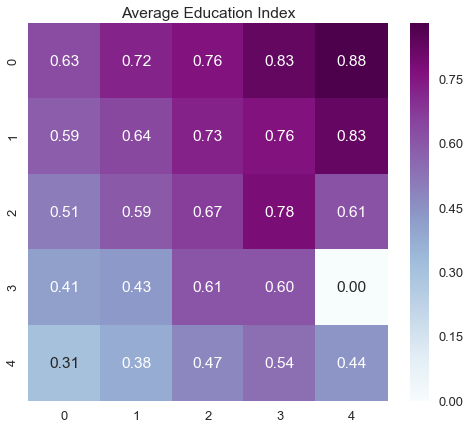

In [191]:
f, (ax3) = plt.subplots(1, figsize=(7, 6), sharex=True)

# Label axes
p=sns.heatmap(matrix,  annot=True, fmt=".2f", cmap="BuPu")

# Finalize the plot
plt.tight_layout(h_pad=2)
ax3.set_title('Average Education Index')

In [192]:
clusteredPopDens = pd.DataFrame(labeledDenormalized.groupby(['coor_1','coor_2'])['PopDens'].mean()).reset_index()
clusteredPopDens.head()

,coor_1,coor_2,PopDens
0,0,0,33.419149
1,0,1,201.188034
2,0,2,160.067897
3,0,3,170.216139
4,0,4,28.242083


In [193]:
clustering = pd.merge(clustering,clusteredPopDens,
                   how='inner',
                   left_on = ['coor_1','coor_2'],
                   right_on = ['coor_1','coor_2'])
clustering.head()

,coor_1,coor_2,Temperature,Precipitation,Urban (%),HDI,Education,PopDens
0,0,0,23.563345,143.845691,79.517958,0.705500,0.628667,33.419149
1,0,1,18.289781,119.093630,78.790000,0.779870,0.723565,201.188034
2,0,2,12.717632,90.587374,64.666833,0.815125,0.758375,160.067897
3,0,3,12.285959,60.517393,78.086050,0.870200,0.828850,170.216139
4,0,4,9.241467,53.701668,80.002880,0.896240,0.878440,28.242083


In [194]:
for i in range(0, len(clusteredPopDens)):
    matrix.iloc[int(clusteredPopDens.iloc[i,0]), int(clusteredPopDens.iloc[i,1])]=clusteredPopDens.iloc[i,2]
matrix = matrix.astype(float)
matrix

,0,1,2,3,4
0,33.419149,201.188034,160.067897,170.216139,28.242083
1,713.151736,1127.580900,257.996222,173.719302,91.650328
2,76.355271,117.001918,212.723506,106.127706,49.942471
3,77.769095,241.753714,95.821577,128.023884,0.000000
4,84.759269,385.908011,249.224175,148.054783,279.683697


Text(0.5,1,'Average Populational Density (Inhabitants/Area)')

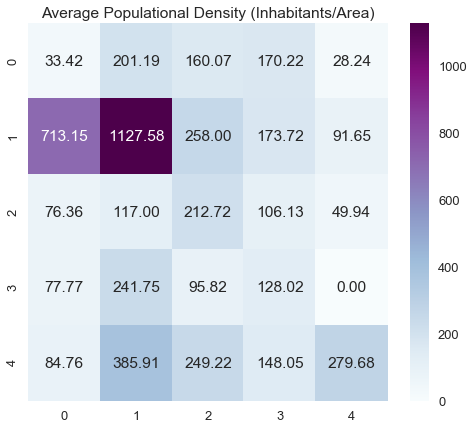

In [195]:
f, (ax3) = plt.subplots(1, figsize=(7, 6), sharex=True)

# Label axes
p=sns.heatmap(matrix,  annot=True, fmt=".2f", cmap="BuPu")

# Finalize the plot
plt.tight_layout(h_pad=2)
ax3.set_title('Average Populational Density (Inhabitants/Area)')

In [196]:
clustering = pd.merge(clustering,mergedOutbreaks,
                   how='inner',
                   left_on = ['coor_1','coor_2'],
                   right_on = ['coor_1','coor_2'])
clustering.head()

,coor_1,coor_2,Temperature,Precipitation,Urban (%),HDI,Education,PopDens,Total,moveToOutbreak,Percentage
0,0,0,23.563345,143.845691,79.517958,0.705500,0.628667,33.419149,24,7,29.166667
1,0,1,18.289781,119.093630,78.790000,0.779870,0.723565,201.188034,23,1,4.347826
2,0,2,12.717632,90.587374,64.666833,0.815125,0.758375,160.067897,24,0,0.000000
3,0,3,12.285959,60.517393,78.086050,0.870200,0.828850,170.216139,20,0,0.000000
4,0,4,9.241467,53.701668,80.002880,0.896240,0.878440,28.242083,25,12,48.000000


In [197]:
clustering = clustering.drop(columns=['coor_1', 'coor_2', 'Total', 'Percentage'])
clustering

,Temperature,Precipitation,Urban (%),HDI,Education,PopDens,moveToOutbreak
0,23.563345,143.845691,79.517958,0.705500,0.628667,33.419149,7
1,18.289781,119.093630,78.790000,0.779870,0.723565,201.188034,1
2,12.717632,90.587374,64.666833,0.815125,0.758375,160.067897,0
3,12.285959,60.517393,78.086050,0.870200,0.828850,170.216139,0
4,9.241467,53.701668,80.002880,0.896240,0.878440,28.242083,12
5,24.526929,178.189468,79.942904,0.691788,0.586673,713.151736,6
6,26.194750,149.526739,63.422867,0.734200,0.638267,1127.580900,0
7,23.718084,135.591140,40.419056,0.770167,0.727222,257.996222,0
8,11.927230,80.271237,70.663000,0.860250,0.759875,173.719302,0
9,17.990345,42.625487,88.416125,0.848250,0.825500,91.650328,0


## Dendogram

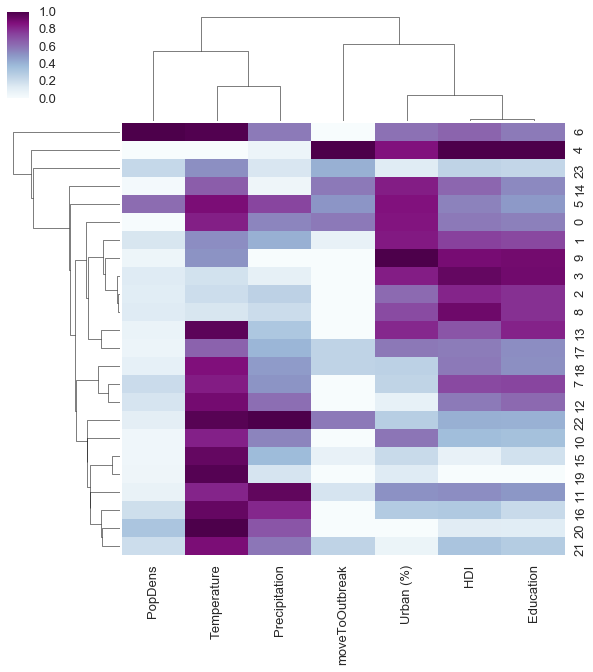

In [200]:

# plot
sns.clustermap(clustering, metric="correlation", method="single", cmap="BuPu", standard_scale=1)


In [ ]:
t.columns